In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import uproot
from scipy.optimize import curve_fit


/home/rhythm/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


## path to .root file

In [ ]:
ucna_1_path = "/home/rhythm/Research/ml/research/2024/feb/ethr-rootfiles/ucna_Ethr1.root" #UCNA
ucna_2_path = "/home/rhythm/Research/ml/research/2024/feb/ethr-rootfiles/ucna_Ethr1.root" #UCNA
ucna_3_path = "/home/rhythm/Research/ml/research/2024/feb/ethr-rootfiles/ucna_Ethr3.root" #UCNA


In [ ]:
ucna_p_1_path = "/home/rhythm/Research/ml/research/2024/feb/ethr-rootfiles/ucnap_Ethr1.root" #UCNA+
ucna_p_2_path = "/home/rhythm/Research/ml/research/2024/feb/ethr-rootfiles/ucnap_Ethr1.root" #UCNA+
ucna_p_3_path = "/home/rhythm/Research/ml/research/2024/feb/ethr-rootfiles/ucnap_Ethr3.root" #UCNA+


In [ ]:
ucna_p_1_path = "/home/rhythm/Research/ml/research/2024/mar/costhChanged/ucnaP-cosTh-5kevbinwidth20kev80Mil.root",#ucnaP-cosTh-5kevbinwidth10kev100Mil.root" #UCNA+
ucna_p_2_path = "/home/rhythm/Research/ml/research/2024/mar/costhChanged/ucnaP-cosTh-5kevbinwidth20kev80Mil.root" #UCNA+
ucna_p_3_path = "/home/rhythm/Research/ml/research/2024/mar/costhChanged/ucnaP-cosTh-5kevbinwidth30kev80Mil.root" #UCNA+

In [32]:
#converting them to df
ucna_p_1 = uproot.open(ucnaP["1"])
#ucna_p_2 = uproot.open(ucna_p_2_path)
#ucna_p_3 = uproot.open(ucna_p_3_path)
#
#ucna_1 = uproot.open(ucna_1_path)
#ucna_2 = uproot.open(ucna_2_path)
#ucna_3 = uproot.open(ucna_3_path)


ucna_p_1.keys()

['KE;1',
 'EdepType01;1',
 'EdepType11;1',
 'EdepType02;1',
 'EdepType12;1',
 'EdepType0;1',
 'EdepType1;1',
 'misEdepType01;1',
 'misEdepType11;1',
 'misEdepType02;1',
 'misEdepType12;1',
 'direct01;1',
 'direct11;1',
 'direct02;1',
 'direct12;1',
 'pzE;1',
 'pz11;1',
 'pz12;1',
 'pz01;1',
 'pz02;1',
 'EdepType01Thr0;1',
 'EdepType11Thr0;1',
 'EdepType02Thr0;1',
 'EdepType12Thr0;1',
 'EdepType0Thr0;1',
 'EdepType1Thr0;1']

## keys

In [2]:
keys = ['KE;1','EdepType01;1','EdepType11;1','EdepType02;1','EdepType12;1','EdepType0;1','EdepType1;1','EdepType01Thr0;1','EdepType11Thr0;1','EdepType02Thr0;1','EdepType12Thr0;1','direct01;1', 'direct11;1', 'direct02;1', 'direct12;1',]

SET 2
\begin{equation}
    cos\theta  \in [-1,1] \rightarrow \theta = acos(cos\theta)  
    and, 
    \Gamma = sin(\theta)(1 + A \beta cos\theta)
\end{equation}

In [ ]:
# Assuming ucnaP is a dictionary containing file paths bin width  5 kev
#ucnaP = {
#    "1": "/home/rhythm/Research/ml/research/2024/mar/eth-5binwidth-ucnaP/n_ucnap_Ethr1_5binwidth.root",
#    "2": "/home/rhythm/Research/ml/research/2024/mar/eth-5binwidth-ucnaP/n_ucnap_Ethr2_5binwidth.root",
#    "3": "/home/rhythm/Research/ml/research/2024/mar/eth-5binwidth-ucnaP/n_ucnap_Ethr3-5binwidth.root"
#}

SET 3
\begin{equation}
    \theta  \in [0,\pi]   
    and, 
    \Gamma = sin(\theta)(1 + A \beta cos\theta)
\end{equation}

In [ ]:
## Assuming ucnaP is a dictionary containing file paths bin width  5 kev
#ucnaP = {
#  #  "1": "/home/rhythm/Research/ml/research/2024/mar/eth-5binwidth-ucnaP/ucnaP-5kevbinwidth10kevEthr.root",#ucnaP-cosTh-5kevbinwidth10kev100Mil.root",
#    "2": "/home/rhythm/Research/ml/research/2024/mar/eth-5binwidth-ucnaP/ucnaP-5kevbinwidth20kevEthr.root",
#    "3": "/home/rhythm/Research/ml/research/2024/mar/eth-5binwidth-ucnaP/ucnaP-5kevbinwidth30kevEthr.root"
#}

SET 1
\begin{equation}
    cos\theta  \in [-1,1]
    and, 
    \Gamma = 1 + A \beta cos\theta
\end{equation}

In [3]:
# here we are again.  the input files are when sampling cosTheta uniformly and not converting into theta and then pdf has 1+A\beta cos\theta
ucnaP = {
    "1": "/home/rhythm/Research/ml/research/2024/mar/uniformcosThDistributionMar22/ucnaP-5kevbinwidth10kevEthr.root",#ucnaP-cosTh-5kevbinwidth10kev100Mil.root",
    "2": "/home/rhythm/Research/ml/research/2024/mar/uniformcosThDistributionMar22/ucnaP-5kevbinwidth20kevEthr.root",
    "3": "/home/rhythm/Research/ml/research/2024/mar/uniformcosThDistributionMar22/ucnaP-5kevbinwidth30kevEthr.root"
}

## nEvents

In [4]:

eLower = [120,150,180,220,260,300]
eUpper = 660
nTot = {}
for key, value in ucnaP.items():
    root_file = uproot.open(value)

    histogram = root_file['KE;1']
    nTot[key]=[]
    for energy in eLower:
        # Define the range of bins you're interested in
        lower_value = energy  # Replace with your lower bound
        upper_value = eUpper  # Replace with your upper bound

        # Get the bin edges and contents
        bin_edges = histogram.axis().edges()
        bin_contents = histogram.values()

        # Find the indices corresponding to the bin edges
        bin_start = (bin_edges >= lower_value).nonzero()[0][0]
        bin_end = (bin_edges <= upper_value).nonzero()[0][-1]

        # Calculate the total content within the specified range
        total_content = sum(bin_contents[bin_start:bin_end])

        nTot[key].append(total_content)

In [5]:
nTot

{'2': [66948147.0, 62438728.0, 57635529.0, 50942900.0, 44116832.0, 37349402.0],
 '3': [66948147.0, 62438728.0, 57635529.0, 50942900.0, 44116832.0, 37349402.0]}

In [24]:
nTot =[66948147.0, 62438728.0, 57635529.0, 50942900.0, 44116832.0, 37349402.0]

In [ ]:
nTot 

In [ ]:
#nTot= [73069975.0, 68152629.0, 62908822.0, 55605052.0, 48162687.0]
#nEvents = 8.73125e+07
#nTot =[73069975.0, 68152629.0, 62908822.0, 55605052.0, 48162687.0, 40781077.0]

In [ ]:
# Assuming ucnaP is a dictionary containing file paths
#bin qidth 0.1 keV
#ucnaP = {
#    "1": "/home/rhythm/Research/ml/research/2024/feb/ethr-root/n_ucnap_Ethr1.root",
#    "2": "/home/rhythm/Research/ml/research/2024/feb/ethr-root/n_ucnap_Ethr2.root",
#    "3": "/home/rhythm/Research/ml/research/2024/feb/ethr-root/n_ucnap_Ethr3.root"
#}

In [ ]:
# Assuming ucnaP is a dictionary containing file paths
#ucnaP_misid = {
#    "1": "/home/rhythm/Research/ml/research/2024/feb/ethr-root-misid-events/n_ucnap_Ethr1.root",
#    "2": "/home/rhythm/Research/ml/research/2024/feb/ethr-root-misid-events/n_ucnap_Ethr2.root",
#    "3": "/home/rhythm/Research/ml/research/2024/feb/ethr-root-misid-events/n_ucnap_Ethr3.root"
#}

In [6]:
key_misid = ['misEdepType01;1','misEdepType11;1','misEdepType02;1','misEdepType12;1']

In [ ]:
#converting them to df
ucna_p_1 = uproot.open(ucnaP["1"])
ucna_p_1.keys()

In [ ]:
ucna = {
"1": "/home/rhythm/Research/ml/research/2024/feb/ethr-root/n_ucna_Ethr1.root",
"2": "/home/rhythm/Research/ml/research/2024/feb/ethr-root/n_ucna_Ethr2.root",
"3": "/home/rhythm/Research/ml/research/2024/feb/ethr-root/n_ucna_Ethr3.root" 
}

## ucnap-df

In [7]:
ucnaP_df = {}
for file_num, file_path in ucnaP.items():
    # Open the ROOT file using uproot
    print(f'file_num : {file_num}')
    with uproot.open(file_path) as file:
        # Access the TTree within the file (replace "tree_name" with the actual tree name)
     #   tree = file["tree_name"]

        # Initialize dictionaries to store results
        content_dict = {}
        edge_dict = {}

        # Loop through the list of keys
        for key in keys:
            # Access the specific branch using the key
            branch = file[key]
            

            # Extract values and edges
            nVal = branch.values()
            nEdge = branch.axis().edges()[:-1]

            # Store results in dictionaries
            content_dict[key] = nVal
            edge_dict[key] = nEdge

        # Create DataFrames from the dictionaries
        values_df = pd.DataFrame(content_dict)
        edge_df = pd.DataFrame(edge_dict)

        # Take one column from edge_df and rename it
        select_edge_col = edge_df['EdepType01;1'].rename('Evals')

        # Concatenate values_df and select_edge_col
        ucnaP_df[file_num] = pd.concat([values_df, select_edge_col], axis=1)

        # Delete temporary DataFrames to free up memory
        del values_df, edge_df, select_edge_col


file_num : 1
file_num : 2
file_num : 3


## ucna-df 

In [ ]:
ucna_df = {}
for file_num, file_path in ucna.items():
    # Open the ROOT file using uproot
    print(f'file_num : {file_num}')
    with uproot.open(file_path) as file:
        # Access the TTree within the file (replace "tree_name" with the actual tree name)
     #   tree = file["tree_name"]

        # Initialize dictionaries to store results
        content_dict = {}
        edge_dict = {}

        # Loop through the list of keys
        for key in keys:
            # Access the specific branch using the key
            branch = file[key]

            # Extract values and edges
            nVal = branch.values()
            nEdge = branch.axis().edges()[:-1]

            # Store results in dictionaries
            content_dict[key] = nVal
            edge_dict[key] = nEdge

        # Create DataFrames from the dictionaries
        values_df = pd.DataFrame(content_dict)
        edge_df = pd.DataFrame(edge_dict)

        # Take one column from edge_df and rename it
        select_edge_col = edge_df['EdepType01;1'].rename('Evals')

        # Concatenate values_df and select_edge_col
        ucna_df[file_num] = pd.concat([values_df, select_edge_col], axis=1)

        # Delete temporary DataFrames to free up memory
        del values_df, edge_df, select_edge_col


## misid df ucna+

In [13]:
ucnaPmis_df = {}
for file_num, file_path in ucnaP.items():
    # Open the ROOT file using uproot
    print(f'file_num : {file_num}')
    with uproot.open(file_path) as file:
        # Access the TTree within the file (replace "tree_name" with the actual tree name)
     #   tree = file["tree_name"]

        # Initialize dictionaries to store results
        content_dict = {}
        edge_dict = {}

        # Loop through the list of keys
        for key in key_misid:
            # Access the specific branch using the key
            branch = file[key]

            # Extract values and edges
            nVal = branch.values()
            nEdge = branch.axis().edges()[:-1]

            # Store results in dictionaries
            content_dict[key] = nVal
            edge_dict[key] = nEdge

        # Create DataFrames from the dictionaries
        values_df = pd.DataFrame(content_dict)
        edge_df = pd.DataFrame(edge_dict)

        # Take one column from edge_df and rename it
        select_edge_col = edge_df['misEdepType01;1'].rename('Evals')

        # Concatenate values_df and select_edge_col
        ucnaPmis_df[file_num] = pd.concat([values_df, select_edge_col], axis=1)

        # Delete temporary DataFrames to free up memory
        del values_df, edge_df, select_edge_col


file_num : 1
file_num : 2
file_num : 3


## ucna+ UCNA angle distribution

In [33]:
#keyAngle = ['pz11;1','pz12;1','pz01;1','pz02;1',]
keyAngle =['pzE;1',
 'pz11;1',
 'pz12;1',
 'pz01;1',
 'pz02;1',]

In [34]:
ucnaAngleInfo_df = {}
for file_num, file_path in ucna.items():
    # Open the ROOT file using uproot
    print(f'file_num : {file_num}')
    with uproot.open(file_path) as file:
        # Access the TTree within the file (replace "tree_name" with the actual tree name)
     #   tree = file["tree_name"]

        # Initialize dictionaries to store results
        content_dict = {}
        edge_dict = {}

        # Loop through the list of keys
        for key in keyAngle:
            # Access the specific branch using the key
            branch = file[key]

            # Extract values and edges
            nVal = branch.values()
            nEdge = branch.axis().edges()[:-1]

            # Store results in dictionaries
            content_dict[key] = nVal
            edge_dict[key] = nEdge

        # Create DataFrames from the dictionaries
        values_df = pd.DataFrame(content_dict)
        edge_df = pd.DataFrame(edge_dict)

        # Take one column from edge_df and rename it
        select_edge_col = edge_df['pz11;1'].rename('cosTh')

        # Concatenate values_df and select_edge_col
        ucnaAngleInfo_df[file_num] = pd.concat([values_df, select_edge_col], axis=1)

        # Delete temporary DataFrames to free up memory
        del values_df, edge_df, select_edge_col


NameError: name 'ucna' is not defined

In [ ]:
ucnaAngleInfo_df["1"]

In [35]:
ucnaPAngleInfo_df = {}
for file_num, file_path in ucnaP.items():
    # Open the ROOT file using uproot
    print(f'file_num : {file_num}')
    with uproot.open(file_path) as file:
        # Access the TTree within the file (replace "tree_name" with the actual tree name)
     #   tree = file["tree_name"]

        # Initialize dictionaries to store results
        content_dict = {}
        edge_dict = {}

        # Loop through the list of keys
        for key in keyAngle:
            # Access the specific branch using the key
            branch = file[key]

            # Extract values and edges
            nVal = branch.values()
            nEdge = branch.axis().edges()[:-1]

            # Store results in dictionaries
            content_dict[key] = nVal
            edge_dict[key] = nEdge

        # Create DataFrames from the dictionaries
        values_df = pd.DataFrame(content_dict)
        edge_df = pd.DataFrame(edge_dict)

        # Take one column from edge_df and rename it
        select_edge_col = edge_df['pz11;1'].rename('cosTh')

        # Concatenate values_df and select_edge_col
        ucnaPAngleInfo_df[file_num] = pd.concat([values_df, select_edge_col], axis=1)

        # Delete temporary DataFrames to free up memory
        del values_df, edge_df, select_edge_col


file_num : 1
file_num : 2
file_num : 3


In [ ]:
ucnaPAngleInfo_df["1"]

/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


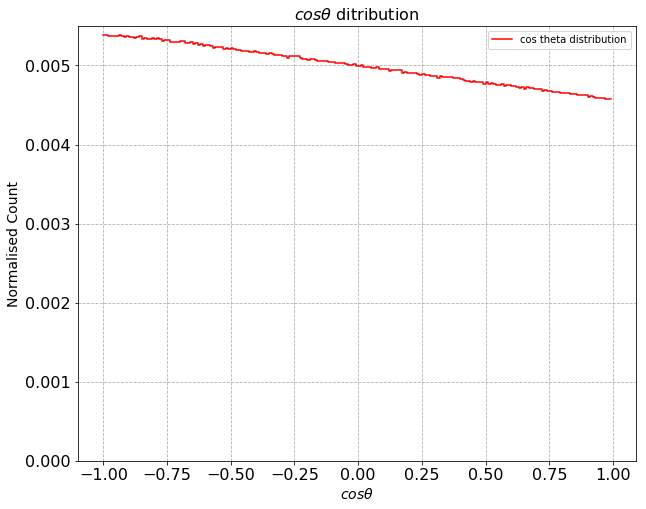

In [44]:
plt.figure(figsize=(10,8))
#plt.step(ucnaPAngleInfo_df["1"]["cosTh"], ucnaPAngleInfo_df["1"]["pz01;1"]/nEvents,c  = 'red',label = 'UCNA+ hits det1')
#plt.step(ucnaPAngleInfo_df["1"]["cosTh"], ucnaPAngleInfo_df["1"]["pz02;1"]/nEvents,c  = 'orange',label = 'UCNA+ hits det2')
#plt.step(ucnaAngleInfo_df["1"]["cosTh"], ucnaAngleInfo_df["1"]["pz01;1"]/NTot, c='blue', label = 'UCNA hits det 1')
#plt.step(ucnaAngleInfo_df["1"]["cosTh"], ucnaAngleInfo_df["1"]["pz02;1"]/NTot, c='green', label = 'UCNA hits det 2')
plt.step(ucnaPAngleInfo_df["1"]["cosTh"], ucnaPAngleInfo_df["1"]["pzE;1"]/nEvents,c  = 'red',label = 'cos theta distribution')

#plt.yscale('log')
#plt.yticks(fontsize = 16)
plt.ylim(0.0, 0.0055)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.grid(linestyle = '--')
plt.legend()
plt.xlabel(r'$cos \theta$', fontsize = 14)
plt.ylabel('Normalised Count', fontsize = 14)
plt.title(r"$cos \theta$ ditribution ", fontsize = 16)
plt.savefig(f'./mar/uniformcosThDistributionMar22/plots/cosTh.png')

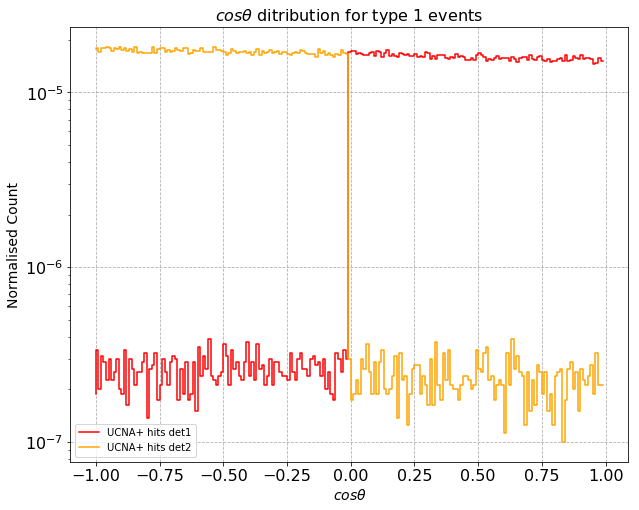

In [39]:
plt.figure(figsize=(10,8))
plt.step(ucnaPAngleInfo_df["1"]["cosTh"], ucnaPAngleInfo_df["1"]["pz11;1"]/nEvents,c  = 'red',label = 'UCNA+ hits det1')
plt.step(ucnaPAngleInfo_df["1"]["cosTh"], ucnaPAngleInfo_df["1"]["pz12;1"]/nEvents,c  = 'orange',label = 'UCNA+ hits det2')
#plt.step(ucnaAngleInfo_df["1"]["cosTh"], ucnaAngleInfo_df["1"]["pz01;1"]/NTot, c='blue', label = 'UCNA hits det 1')
#plt.step(ucnaAngleInfo_df["1"]["cosTh"], ucnaAngleInfo_df["1"]["pz02;1"]/NTot, c='green', label = 'UCNA hits det 2')
plt.yscale('log')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.grid(linestyle = '--')
plt.legend()
plt.xlabel(r'$cos \theta$', fontsize = 14)
plt.ylabel('Normalised Count', fontsize = 14)
plt.title(r"$cos \theta$ ditribution for type 1 events ", fontsize = 16)
plt.savefig(f'./mar/uniformcosThDistributionMar22/plots/cosThType1.png')

In [ ]:
plt.figure(figsize=(10,8))
plt.step(ucnaPAngleInfo_df["1"]["cosTh"], ucnaPAngleInfo_df["1"]["pz11;1"]/NTot,c  = 'red',label = 'UCNA+ hits det1')
plt.step(ucnaPAngleInfo_df["1"]["cosTh"], ucnaPAngleInfo_df["1"]["pz12;1"]/NTot,c  = 'orange',label = 'UCNA+ hits det2')

plt.step(ucnaAngleInfo_df["1"]["cosTh"], ucnaAngleInfo_df["1"]["pz11;1"]/NTot, c='blue', label = 'UCNA hits det 1')
plt.step(ucnaAngleInfo_df["1"]["cosTh"], ucnaAngleInfo_df["1"]["pz12;1"]/NTot, c='green', label = 'UCNA hits det 2')
plt.yscale('log')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.grid(linestyle = '--')
plt.ylim(10^-9,10^-3)
plt.legend()
plt.xlabel(r'$cos \theta$', fontsize = 14)
plt.ylabel('Normalised Count', fontsize = 14)
plt.title(r"$cos \theta$ ditribution for type 1 events ", fontsize = 16)
plt.savefig(f'./feb/ethr-root/cosThType1.png')

## asymmetry - type 0 and type 1

In [11]:
def beta (KE): # beta = p_E / Ee = np.sqrt((KE)^2 + 2*m_e*KE) / (m_e + KE)
    m_e = 511; 
    beta = np.sqrt((KE*KE) + (2*m_e*KE)) / (m_e + KE)
    return beta

In [12]:
def asymm_meas(df, col1, col2, col,errCol):
    df['EMid'] = (df['Evals'] + df['Evals'].shift(-1)) / 2
# Drop the last row since there's no next row for it
#    df = df[:-1]
   # Set the first index of the new column to 0
    df['EMidNew'] = df['EMid'].shift(1)
    df.at[df.index[0], 'EMidNew'] = 0
     
    df['beta'] = beta(df['EMidNew'])
    df[col] = (df[col1] - df[col2])/((df[col1] + df[col2])*(df['beta']/2))
    df[errCol] = df[col]*np.sqrt((1/df[col1]) + (1/df[col2])) 
   
    return df

## adding A col

In [27]:
for key in ucnaP_df.keys():
   ucnap_item = asymm_meas(df = ucnaP_df[key], col1='EdepType01;1', col2 = 'EdepType02;1', col = 'a_type0', errCol='errA_type0')
   ucnap_item = asymm_meas(df = ucnaP_df[key], col1='EdepType11;1', col2 = 'EdepType12;1', col = 'a_type1', errCol='errA_type1')
  
   ucnap_item = asymm_meas(df = ucnaP_df[key], col1='direct01;1', col2 = 'direct02;1', col = 'directa_type0', errCol='errdirectA_type0')
   ucnap_item = asymm_meas(df = ucnaP_df[key], col1='direct11;1', col2 = 'direct12;1', col = 'directa_type1', errCol='errdirectA_type1')
   
   ucnap_item = asymm_meas(df = ucnaPmis_df[key], col1='misEdepType01;1', col2 = 'misEdepType02;1', col = 'a_type0misid', errCol='errA_type0MisId')
   ucnap_item = asymm_meas(df = ucnaPmis_df[key], col1='misEdepType11;1', col2 = 'misEdepType12;1', col = 'a_type1misid', errCol='errA_type1MisId')
  

In [29]:
def linear_function(x, m, b):
    return m * x + b

def fittingFunc(df,col, fitting_range, a, errA ):
    x_data = df[key]['Evals']
    y_data = df[key][col]

    mask = (x_data >= fitting_range[0]) & (x_data <= fitting_range[1])&  (~np.isnan(y_data))
    x_data_filtered = x_data[mask]
    y_data_filtered = y_data[mask]
    params, covariance = curve_fit(linear_function,  x_data_filtered, y_data_filtered)
    fitted_m = params[0]
    fitted_b = params[1]
    
    a.append(fitted_b)
    errA.append(covariance[1,1]**0.5)
    y_pred = linear_function(x_data_filtered, fitted_m, fitted_b)
    return y_pred, x_data, a,errA,x_data_filtered, y_data

## fitting ucna+ A

In [30]:
a0_misid = []

erra0_misid = []


In [31]:

a1_misid = []
erra1_misid = []

In [32]:
aMeas1_ucnap = []

erraMeas1_ucnap = []


In [33]:
aMeas0_ucnap_direct = []

erraMeas0_ucnap_direct = []

In [34]:
aMeas1_ucnap_direct = []

erraMeas1_ucnap_direct = []

In [35]:
aMeas0_ucnap = []

erraMeas0_ucnap = []

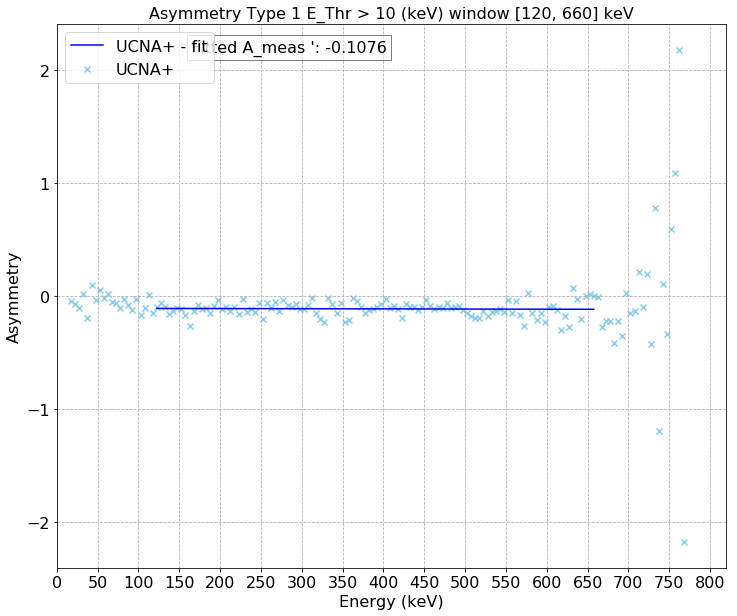

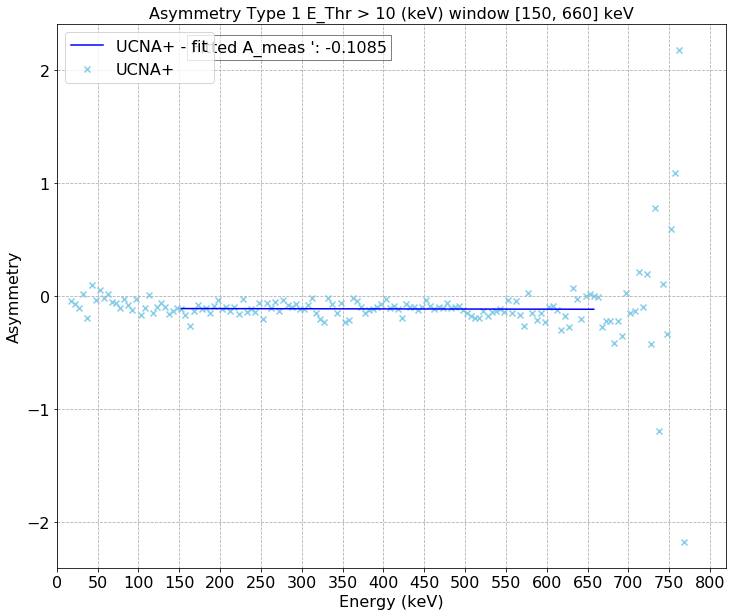

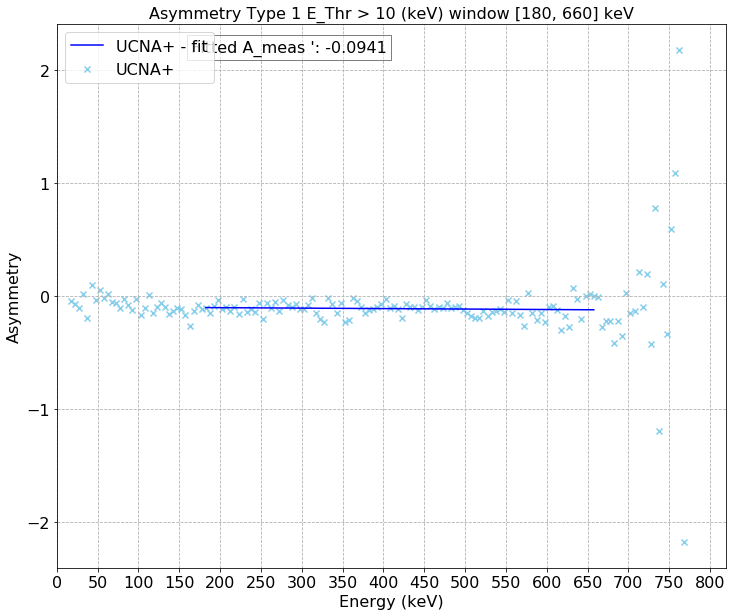

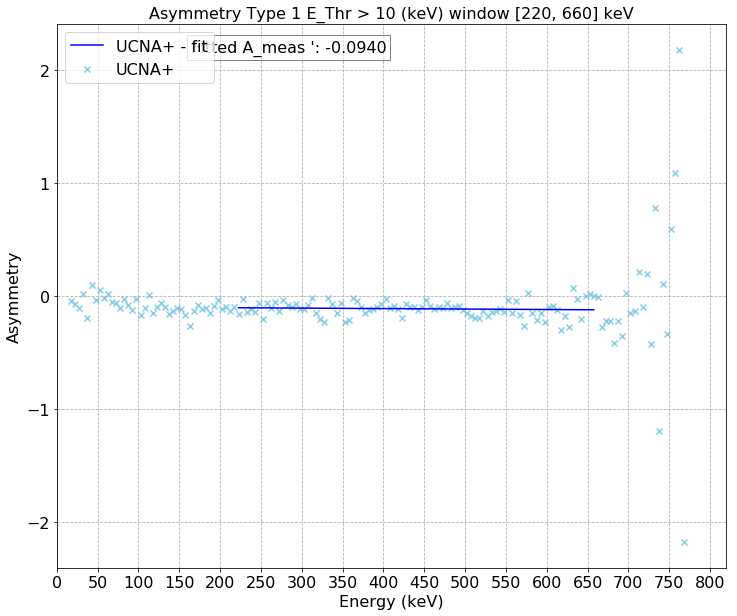

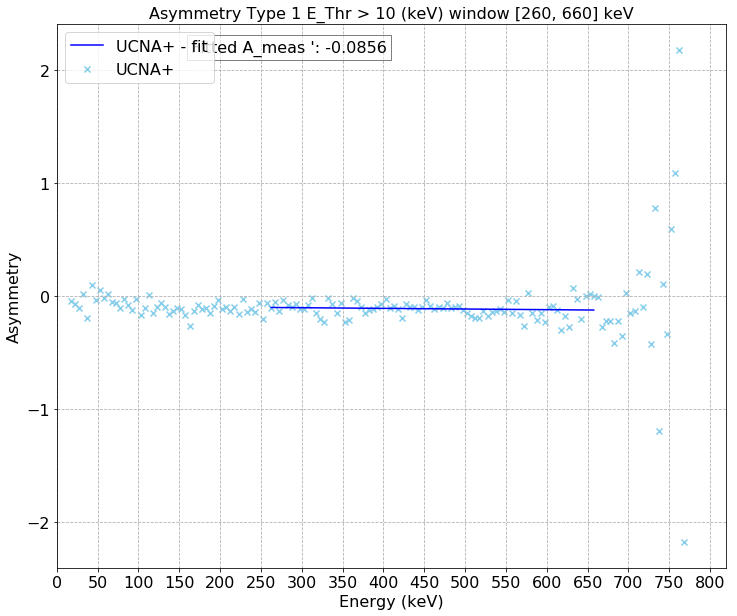

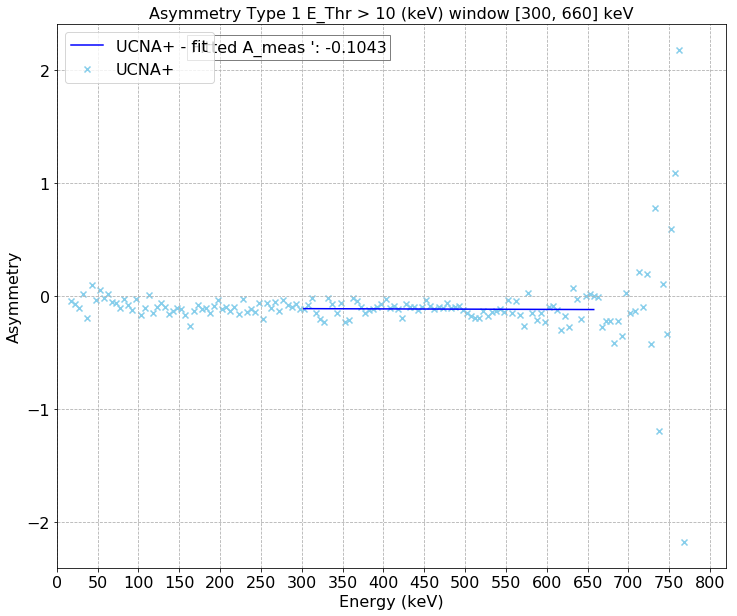

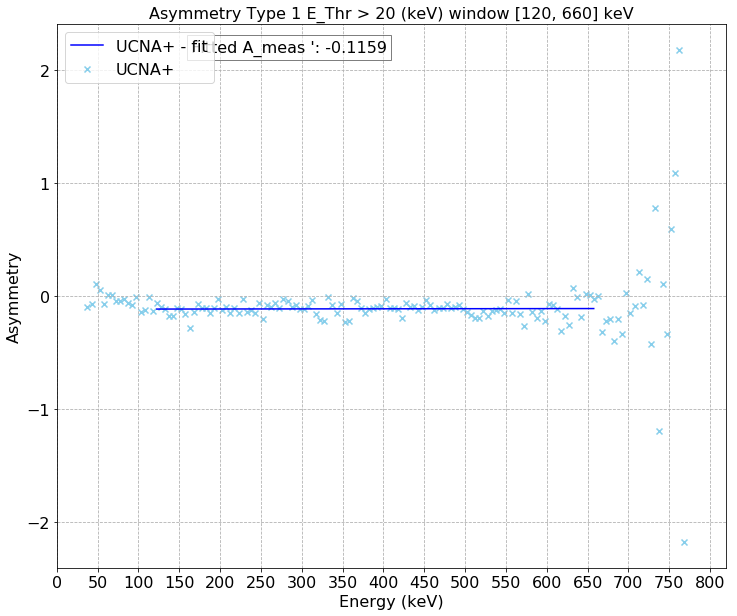

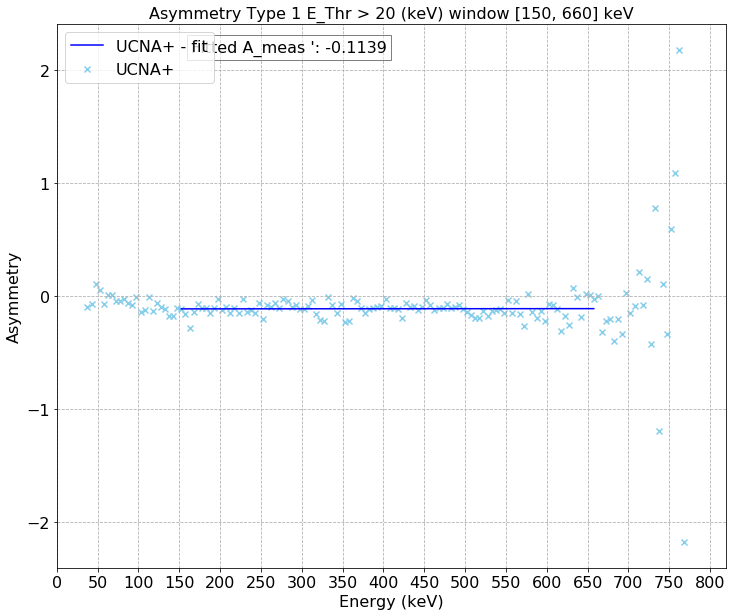

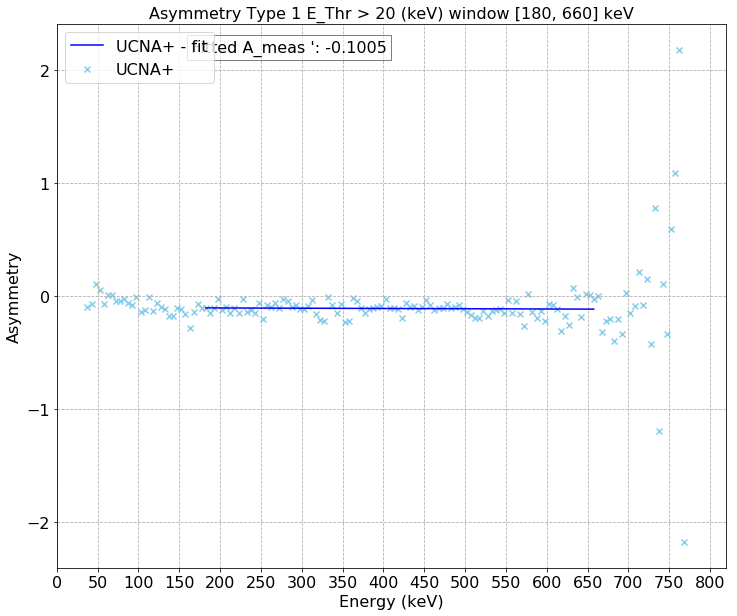

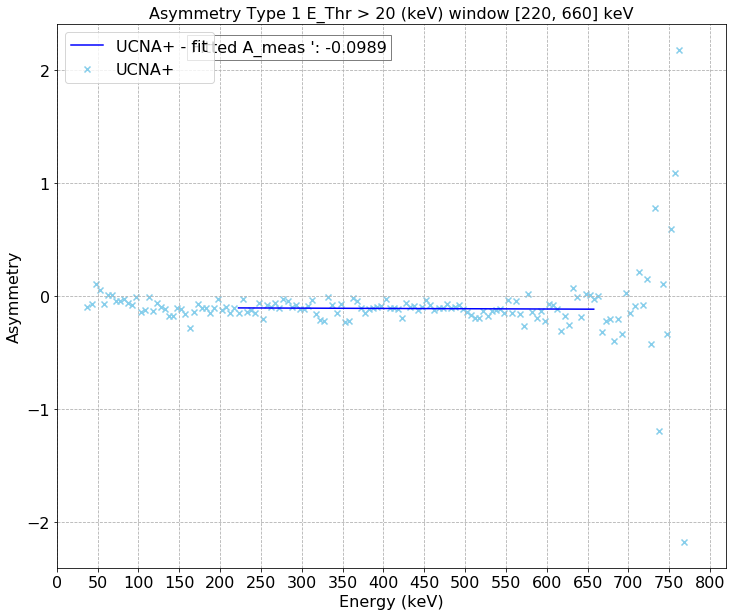

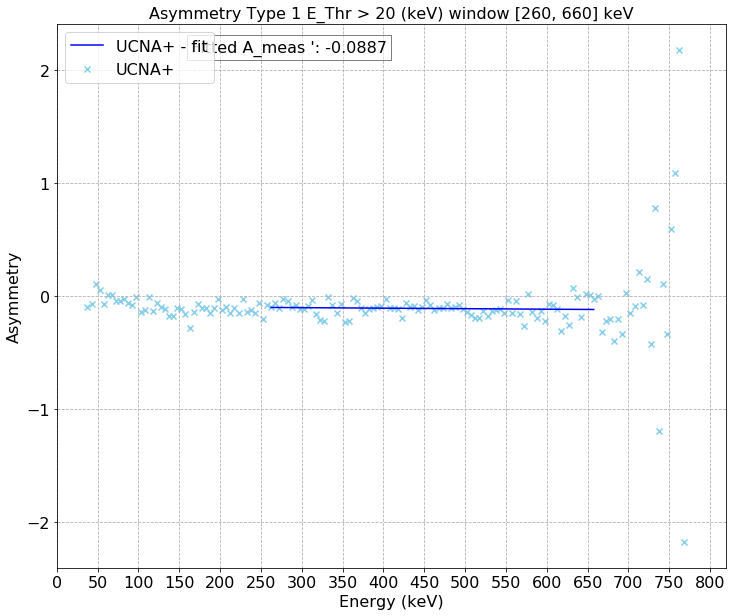

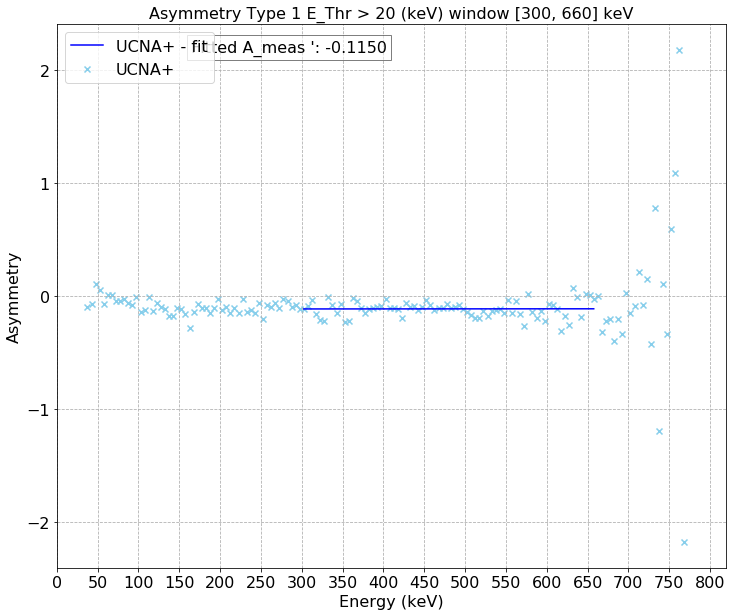

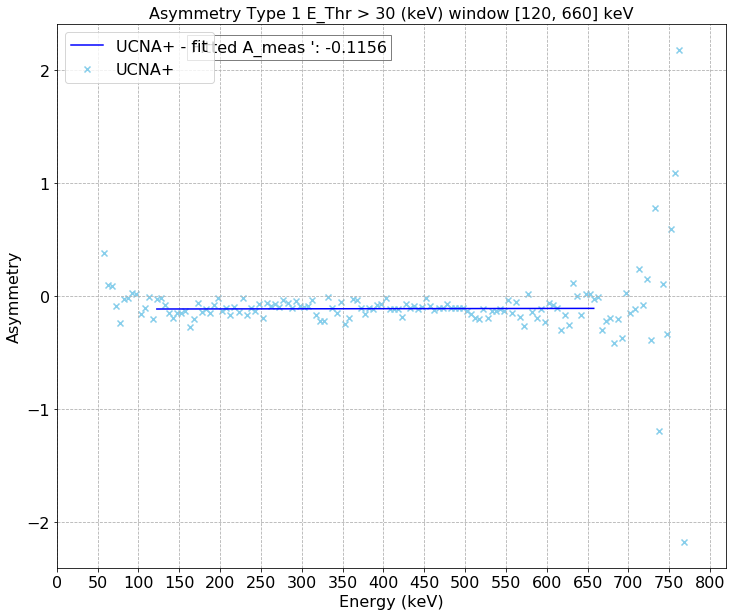

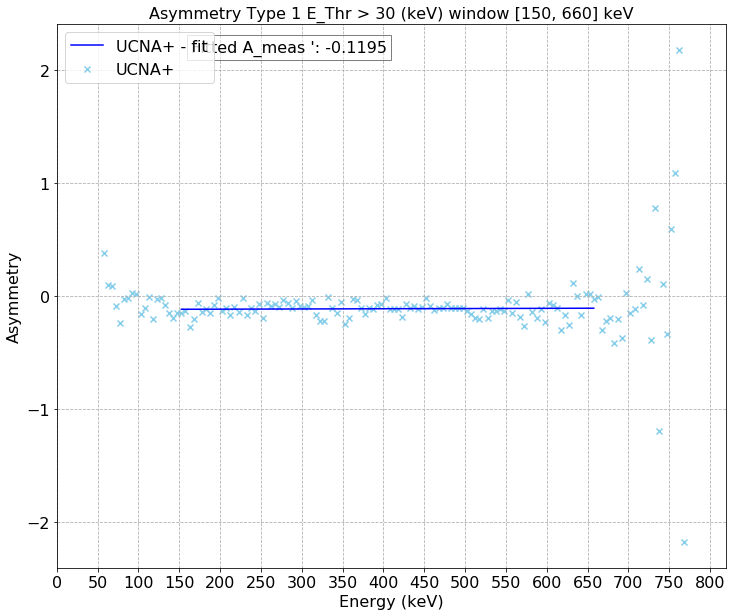

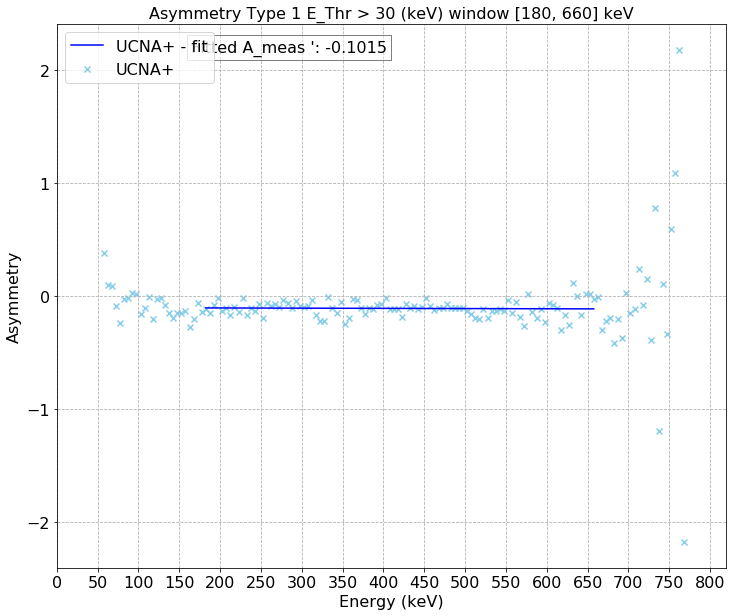

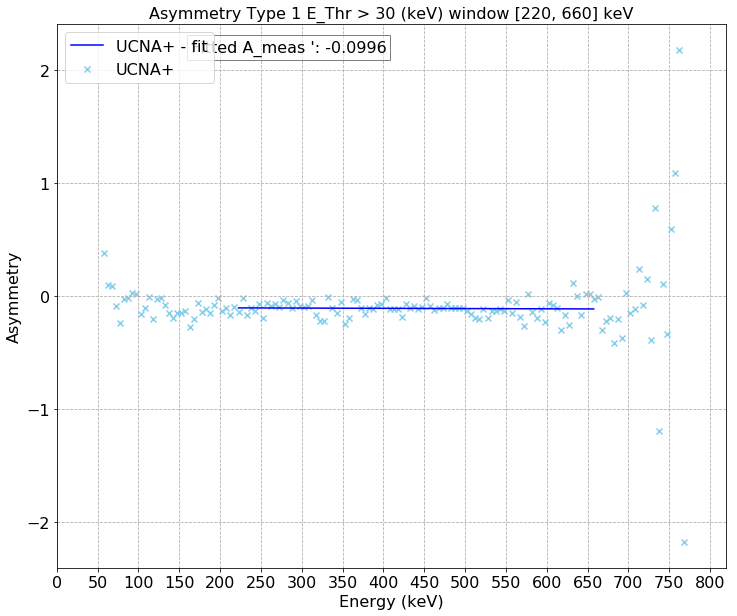

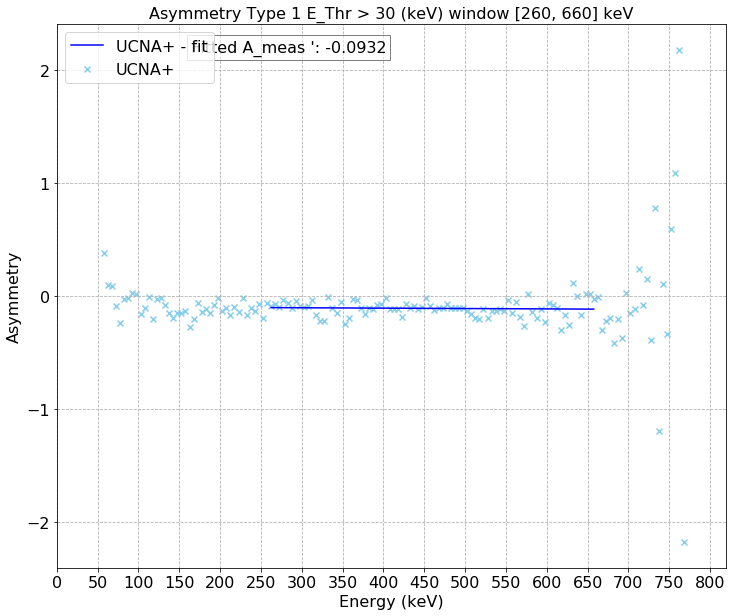

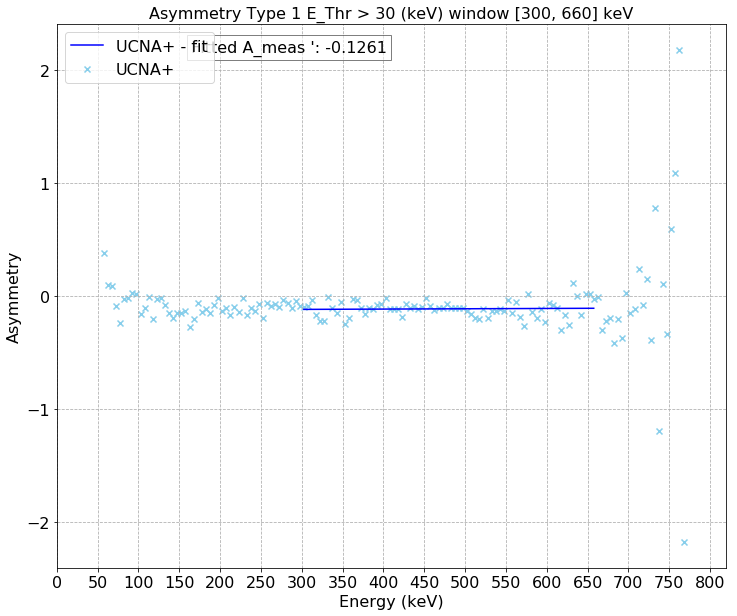

In [41]:
E_list = [120,150,180,220,260,300]

for key in ucnaP_df.keys():
    for Ewin in E_list :  
        fitting_range = (Ewin, 660)  # Example: fit between x=2 and x=4
        # Filter the data within the desired range
      #  x_data = ucnaPmis_df[key]['EMidNew']
      #  y_data = ucnaPmis_df[key]['a_type1misid'] 
      #  x_data = ucnaP_df[key]['EMidNew']
      #  y_data = ucnaP_df[key]['a_type1'] 
        x_data = ucnaP_df[key]['EMidNew']
        y_data = ucnaP_df[key]['directa_type1'] 
    
        ################################################

        mask = (x_data >= fitting_range[0]) & (x_data <= fitting_range[1])&  (~np.isnan(y_data))
        x_data_filtered = x_data[mask]
        y_data_filtered = y_data[mask]
        params, covariance = curve_fit(linear_function,  x_data_filtered, y_data_filtered)
        fitted_m = params[0]
        fitted_b = params[1]
        # Extract standard errors (errors in the parameters)
        errors = np.sqrt(np.diag(covariance))

# Get the error in 'b'
        error_b = errors[1]
     #   aMeas1_ucnap.append(fitted_b) ################################################
     #   erraMeas1_ucnap.append(covariance[1][1]) ###################
        
     #   a1_misid.append(fitted_b) ################################################
     #   erra1_misid.append(covariance[1][1]) ###################
    
        aMeas1_ucnap_direct.append(fitted_b) ################################################
        erraMeas1_ucnap_direct.append(covariance[1][1]) ###################
    
        y_pred = linear_function(x_data_filtered, fitted_m, fitted_b)
        plt.figure(figsize=(12, 10))
##
        ## Plot the original data and the fitted linear curve
    #    plt.scatter(x_data, y_data,  marker='o', facecolors='none', edgecolors='salmon',label='UCNA+')
        plt.scatter(x_data, y_data,  marker='x', color='skyblue',label='UCNA+')
    
        plt.plot(x_data_filtered, y_pred, label='UCNA+ - fit', color='blue')
     #
        plt.xlabel("Energy (keV)", fontsize=16)
        plt.ylabel("Asymmetry", fontsize=16)
     #   plt.ylim(-0.4, 0.0) #######
        plt.yticks( fontsize=16)
        plt.xlim(0, 820)
        plt.xticks(np.arange(0, 820, 50), fontsize=16)
        plt.grid(linestyle='--')
#
        ## Add a legend if needed
        plt.legend()
    # An#notate the plot with the fitted intercept value in a box
        plt.text(0.2, 0.95, f"Fitted A_meas ': {fitted_b:.4f}", transform=plt.gca().transAxes,
                 bbox=dict(facecolor='white', alpha=0.5), fontsize = 16)
        
        plt.legend(fontsize = 16)
       # plt.show()
        plt.title(f"Asymmetry Type 1 E_Thr > {key}0 (keV) window [{Ewin}, 660] keV", fontsize=16) ######
        plt.savefig(f'./mar/uniformcosThDistributionMar22/plots/a_type1-direct{str(key)}forWin{str(Ewin)}660.png') #####
 

In [42]:
### 5 keV binWidth values
print(f'a0_misid  = {a0_misid}') 
print(f'a1_misid  = {a1_misid}') 
print(f'aMeas0_ucnap = {aMeas0_ucnap}')
print(f'aMeas1_ucnap = {aMeas1_ucnap}')
print(f'aMeas0_ucnap_direct = {aMeas0_ucnap_direct}')
print(f'aMeas1_ucnap_direct = {aMeas1_ucnap_direct}')

print(f'erra0_misid = {erra0_misid}')
print(f'erra1_misid = {erra1_misid}')
print(f'erraMeas0_ucnap = {erraMeas0_ucnap}')
print(f'erraMeas1_ucnap = {erraMeas1_ucnap}')
print(f'erraMeas0_ucnap_direct = {erraMeas0_ucnap_direct}')
print(f'erraMeas1_ucnap_direct = {erraMeas1_ucnap_direct}')

a0_misid  = [0.08720511974345535, 0.10430826836939999, 0.14565568882448388, 0.22606682977102377, 0.1743961186203986, 0.3257038201982169, 0.1831564638199873, 0.21923046790910972, 0.23686142585670533, 0.24626095982391838, 0.26732651465345036, 0.3738666769777369, 0.24508165983802077, 0.2943343644927924, 0.31553930030069843, 0.3407921942689497, 0.3997582499122032, 0.45555208717385876]
a1_misid  = [0.2747536631230575, 0.27799438102948926, 0.34596211839968083, 0.3771153443219908, 0.5002376310877519, 0.5706575064880495, 0.25379772711497106, 0.2712081803967977, 0.36885291188705077, 0.3773992600346837, 0.5166210553151134, 0.6008573832411873, 0.27010483583444045, 0.30395226724313185, 0.35416983319555073, 0.34263197803417667, 0.4570162409333882, 0.5331075487683892]
aMeas0_ucnap = [-0.12098642431042318, -0.12095745207314813, -0.12002556465796899, -0.1195659259847403, -0.12018141708545137, -0.1204326123511871, -0.12092753834234723, -0.1209039273352776, -0.11998737551436989, -0.11955404352027162, -0

In [43]:
# asymmetries when the costh is uniformly sampled and 1+abetacosTh
a0_misid  = [0.08720511974345535, 0.10430826836939999, 0.14565568882448388, 0.22606682977102377, 0.1743961186203986, 0.3257038201982169, 0.1831564638199873, 0.21923046790910972, 0.23686142585670533, 0.24626095982391838, 0.26732651465345036, 0.3738666769777369, 0.24508165983802077, 0.2943343644927924, 0.31553930030069843, 0.3407921942689497, 0.3997582499122032, 0.45555208717385876]
a1_misid  = [0.2747536631230575, 0.27799438102948926, 0.34596211839968083, 0.3771153443219908, 0.5002376310877519, 0.5706575064880495, 0.25379772711497106, 0.2712081803967977, 0.36885291188705077, 0.3773992600346837, 0.5166210553151134, 0.6008573832411873, 0.27010483583444045, 0.30395226724313185, 0.35416983319555073, 0.34263197803417667, 0.4570162409333882, 0.5331075487683892]
aMeas0_ucnap = [-0.12098642431042318, -0.12095745207314813, -0.12002556465796899, -0.1195659259847403, -0.12018141708545137, -0.1204326123511871, -0.12092753834234723, -0.1209039273352776, -0.11998737551436989, -0.11955404352027162, -0.12017864815582001, -0.1204249245097352, -0.1208809731227438, -0.12086606061281932, -0.11996394575016357, -0.11953583206844867, -0.12015333768030032, -0.12039689541741361]
aMeas1_ucnap = [-0.10211877648674392, -0.1029323928208724, -0.08767165517092645, -0.08732061617508542, -0.07778151040830172, -0.09593785861801109, -0.11066604081855957, -0.10860922484743996, -0.09400992248623286, -0.0926364533381727, -0.08122167157185411, -0.10668653707343734, -0.11050960564506007, -0.11409444850298248, -0.09554247499657742, -0.09421444882378681, -0.08695375840954878, -0.11912654571216663]
aMeas0_ucnap_direct = [-0.12099450907395151, -0.1209609786207123, -0.12002798969533382, -0.119569316661763, -0.1201803293803188, -0.12043258610293273, -0.12097960384427588, -0.12094713008502692, -0.12001738584387388, -0.11956896279165846, -0.12018483860660127, -0.12042842593621306, -0.12096724552301584, -0.12094061774421369, -0.1200159541571285, -0.11956907646100735, -0.12017936721324642, -0.12041440781041564]
aMeas1_ucnap_direct = [-0.10759791989152867, -0.10851824680710287, -0.09411365106463254, -0.09400730372690669, -0.08555474169376098, -0.10428897645659045, -0.11590970760809327, -0.11390908658095933, -0.1005167169954384, -0.09885465701722551, -0.08870560349149392, -0.11499296065919173, -0.11561152424597743, -0.11952806331038084, -0.10154076486776131, -0.0996097774209257, -0.09321633060845769, -0.1261213642873982]
erra0_misid = [0.06941447953247805, 0.09249030130822022, 0.1249755405699978, 0.1897386887926401, 0.2964323776656383, 0.48659418290423173, 0.049358358697631007, 0.06542199056265956, 0.08787243730726559, 0.13354293076261753, 0.20898479548090448, 0.3399796824336103, 0.03992466608818639, 0.052872073542300335, 0.07104586260383117, 0.10812194345825887, 0.16925017842326637, 0.27514537338402145]
erra1_misid = [0.023051198408812416, 0.028314162420133727, 0.03657124351722318, 0.053501047037478044, 0.07978868666815732, 0.12451503184846467, 0.02374348228488605, 0.028620833216399903, 0.03604028239248095, 0.05181806905438344, 0.07740373247165898, 0.12068790013378047, 0.025730589589976247, 0.030894605662717137, 0.03887498915631676, 0.05615331174769714, 0.08410700821476833, 0.13007385377385733]
erraMeas0_ucnap = [9.808940789192375e-07, 1.205285122292501e-06, 1.5622282929668006e-06, 2.2506728833809127e-06, 3.4466608444585945e-06, 5.369690703009392e-06, 9.793261732965529e-07, 1.2040078519782485e-06, 1.5620664208311598e-06, 2.2509317870651027e-06, 3.448015940207753e-06, 5.374568272549294e-06, 9.796180917066675e-07, 1.2034376506135773e-06, 1.5629707059829854e-06, 2.2517558299727622e-06, 3.448552777732779e-06, 5.379613857334716e-06]
erraMeas1_ucnap = [0.00029398980777123036, 0.000385912680632899, 0.0004867915614986182, 0.0007259053943383772, 0.0010729026956763363, 0.0017119422182832402, 0.0002979959426542566, 0.0003876687269464135, 0.0004847355024072215, 0.0007160885539348502, 0.0010546246510274207, 0.0016672707826173414, 0.0003268918462161651, 0.0004144004478745341, 0.0005127342022723801, 0.0007533610773444887, 0.0011122047935451405, 0.0017572749809433438]
erraMeas0_ucnap_direct = [9.800199872548922e-07, 1.2042960071389321e-06, 1.5608205407372208e-06, 2.249170882590295e-06, 3.444882784316617e-06, 5.366767414557292e-06, 9.805025337714577e-07, 1.203641184482748e-06, 1.560376799568815e-06, 2.2490905054726215e-06, 3.4451512979809174e-06, 5.369064370708787e-06, 9.804827342147479e-07, 1.2026806037130253e-06, 1.5596017649068588e-06, 2.246665647234611e-06, 3.4409253185432866e-06, 5.366504286312372e-06]
erraMeas1_ucnap_direct = [0.0002935775412032819, 0.00038325063412575095, 0.000480280627728846, 0.0007164363606974408, 0.0010633873847210602, 0.0016924604785184022, 0.00029756018135459024, 0.00038444389282097545, 0.0004763013014094268, 0.0007058003446381058, 0.0010426691945590763, 0.0016476479182875167, 0.0003298989324285888, 0.00041360728077052876, 0.0005088129349193031, 0.0007481055781942413, 0.0011081760965209017, 0.00174718630677772]

In [ ]:
#the beta is changes previously emid was estimated incorectly
#a0_misid  = [-0.37984536998737606, -0.36790988486072307, -0.3546098055732312, -0.34497503447571826, -0.3430250772867762, -0.3335416881430363, -0.3755140095260616, -0.3640797018782505, -0.3511608751496484, -0.3429454139144959, -0.34189265902668625, -0.3331100336432027, -0.3708677004396837, -0.3601565169009794, -0.34802829830164933, -0.33939947311686514, -0.33813996074908925, -0.3296525341291601]
#a1_misid  = [-0.29906711930294905, -0.288567634436929, -0.24734132470597828, -0.23507012546637185, -0.23387752977727844, -0.19216398185632846, -0.3314112163026265, -0.32294997675806725, -0.28290605838838734, -0.25817841654456486, -0.25660455672275523, -0.22593102593407066, -0.3485935448630384, -0.34284887119444263, -0.3063098757566745, -0.2687469766864967, -0.2636907592826947, -0.2405030179422707]
#aMeas0_ucnap = [-0.12997611041345994, -0.12686453899510566, -0.12450702304863984, -0.12277971076733862, -0.12091445367820218, -0.11950780366600919, -0.12981430447781886, -0.1267354517524745, -0.12438728305521075, -0.12267006056796441, -0.12084736623742898, -0.11947109028583074, -0.12968500080523523, -0.12662094477307362, -0.12432378531685032, -0.12260800727247582, -0.12080577084954298, -0.11943210509612773]
#aMeas1_ucnap = [-0.09749517198904466, -0.09664306970425669, -0.09639240516856079, -0.09752220462320428, -0.09728804940669694, -0.10053433737443679, -0.10381121080428188, -0.10247710764034497, -0.10171925420917231, -0.10283054318357321, -0.10387570677375708, -0.10683866223803486, -0.10382282067516908, -0.1037016371133532, -0.1037368560927529, -0.10178429801779355, -0.1023591421795827, -0.10386097404975862]
#aMeas0_ucnap_direct = [-0.12097910205415512, -0.11869317127076219, -0.11709441943882817, -0.1160042036589716, -0.11445146810011758, -0.1135087843934802, -0.12087289217656307, -0.11861641662024447, -0.11702261538223938, -0.11590401988573519, -0.11437495479816653, -0.1134542880127751, -0.12081656537086594, -0.11855869684707347, -0.11699731937989795, -0.11589530379854557, -0.11439020614005936, -0.11346042593034678]
#aMeas1_ucnap_direct = [-0.08409029960578275, -0.08425654916101018, -0.08712811169073285, -0.08935200438902609, -0.08954991108042569, -0.09565963160117376, -0.08946024080222405, -0.08892591603934018, -0.09111353757491472, -0.09405707701353382, -0.09571096627493239, -0.10087067729447542, -0.0887967777416738, -0.08939293053323442, -0.09210796767459706, -0.09255264828516016, -0.09390333768822186, -0.09705741363811303]
#erra0_misid = [5.4417825639070225e-05, 6.415717950351432e-05, 7.523692050798492e-05, 0.00010683497643212748, 0.00016297632520005005, 0.00025099116913285426, 5.243217302001065e-05, 6.214251188733973e-05, 7.312241650844542e-05, 0.00010510872318850327, 0.00016087728029840463, 0.00024826675258517893, 5.0979762929270175e-05, 6.123075926795624e-05, 7.295017620715416e-05, 0.00010434222636574365, 0.00015980411826624707, 0.0002471356982149891]
#erra1_misid = [0.0008144749056249194, 0.0010395161294909532, 0.0012635426183485283, 0.0018199370500148293, 0.0027406852469488104, 0.004246997535771475, 0.0008921293278857938, 0.0011376576660519474, 0.0014107320268225614, 0.002017328464471824, 0.0030234295194793287, 0.0047681987492633245, 0.0009419310928462115, 0.0011731448135604977, 0.0014698622816148995, 0.002056442154168856, 0.0030650240464396294, 0.004908064803960208]
#erraMeas0_ucnap = [1.3518734436132737e-06, 1.2857300921986056e-06, 1.3938758845497545e-06, 1.937227018778699e-06, 2.7547247213069684e-06, 4.316757105899741e-06, 1.338498823350092e-06, 1.2787132629541885e-06, 1.3881671808721583e-06, 1.9283014103084183e-06, 2.7523643673592276e-06, 4.30912812631731e-06, 1.3326922030666024e-06, 1.2752293098566987e-06, 1.3968256145221192e-06, 1.9415930835848447e-06, 2.7743141555094726e-06, 4.343594941074178e-06]
#erraMeas1_ucnap = [4.525060581177607e-05, 5.640326509349069e-05, 6.927634304487981e-05, 9.824592365402793e-05, 0.00015207867319871093, 0.00023462406133504136, 4.8340344640032e-05, 5.9571312045973855e-05, 7.266059848634119e-05, 0.00010194789598868549, 0.00015841622355321065, 0.00024282269233205536, 5.085509176804691e-05, 6.299571413593644e-05, 7.809266575466007e-05, 0.00010940768446853653, 0.0001683758016581175, 0.0002575993755600313]
#erraMeas0_ucnap_direct = [1.07800701661009e-06, 1.1496413942168775e-06, 1.3659834807248518e-06, 1.967284301626257e-06, 2.8507599220000326e-06, 4.492822604029708e-06, 1.0698177188845788e-06, 1.1460667639202532e-06, 1.3628520974704405e-06, 1.9585487273611797e-06, 2.842099107891663e-06, 4.478636253459083e-06, 1.0714090627978774e-06, 1.1462187780352722e-06, 1.370127016594571e-06, 1.970187054095448e-06, 2.8610063867013834e-06, 4.508870119424459e-06]
#erraMeas1_ucnap_direct = [5.059396214389142e-05, 6.269188220646679e-05, 7.859374539739759e-05, 0.00011204348558604406, 0.00017196902418655695, 0.00026451997739833133, 5.364184385651047e-05, 6.557626093819566e-05, 8.155972883773784e-05, 0.0001151405477806607, 0.00017744359013370615, 0.0002720493886754754, 5.574884572701935e-05, 6.872816176284612e-05, 8.582259189633027e-05, 0.00012108127526259627, 0.00018553966370360195, 0.00028456810706335267]

In [ ]:
# coming from just type 0 and type 1 includes misbackscattered events too
#a0_misid  = [-0.3813793382785826, -0.3682779406932095, -0.3563829525308364, -0.34619280519524154, -0.3432800195768162, -0.33614999264144296, -0.37693486235631973, -0.3643844751225725, -0.35293902319405135, -0.34408145402402407, -0.34202185698854, -0.3361281704796387, -0.3723055942115425, -0.3605026847910714, -0.34972516412477667, -0.3406107684545983, -0.33842149920038705, -0.3326172007751867]
#a1_misid  = [-0.3023206821425737, -0.28659013544828515, -0.25095991269877027, -0.23037936293461603, -0.21971442183887113, -0.19917755959572636, -0.33576612374174597, -0.3183776235769609, -0.2851212162446721, -0.2544299643599988, -0.24172091396595352, -0.23083738674573162, -0.35645311800473234, -0.339417281763412, -0.3069953910034937, -0.26445913494582185, -0.2504366991028224, -0.2409957826424789]
#aMeas0_ucnap = [-0.13013409328822845, -0.1267238928905251, -0.12446239408354506, -0.12271854935743928, -0.12067895655435046, -0.11971735329182912, -0.12995495741522475, -0.1265914226243925, -0.12434254016662703, -0.1226127453687648, -0.12061316065342699, -0.1197040296682478, -0.12983612446715298, -0.12647283235486625, -0.12428097005798514, -0.12254834190124285, -0.12056699951147672, -0.11966791843560691]
#aMeas1_ucnap = [-0.09580348379155049, -0.09637559682714039, -0.09416987358796469, -0.09751377673490737, -0.09816173332706316, -0.10396984914538882, -0.10236636111410624, -0.10214516025145086, -0.09930590008247869, -0.10212847143355679, -0.1041807602119931, -0.10952131516585024, -0.10340506767385353, -0.10369668369569987, -0.10217627615153563, -0.10153717632070144, -0.10266378844581128, -0.10625162043559702]
#erra0_misid = [5.406635122016537e-05, 6.190499389881005e-05, 7.39030929491703e-05, 0.00010304903948489583, 0.00015515294527828686, 0.00024006397404849117, 5.2022837337759044e-05, 5.9951622262825695e-05, 7.191008366231329e-05, 0.00010132736934108995, 0.00015310654978197588, 0.00023822825508807338, 5.0681514483084456e-05, 5.912223359900853e-05, 7.163315680156756e-05, 0.00010067924072106816, 0.00015216036350642603, 0.00023707191518738122]
#erra1_misid = [0.0007872116333256662, 0.0009989589782598979, 0.0012152628009686338, 0.0017440886700756141, 0.0026599897266407248, 0.004029142128136629, 0.0008643839553169026, 0.0010972819091463154, 0.001353950939041309, 0.001930708484742696, 0.0029350662352528424, 0.00451468874174858, 0.0009239428584339665, 0.0011290652436139101, 0.0014091201367645307, 0.001969148423364751, 0.002962155651425969, 0.004640490924005405]
#erraMeas0_ucnap = [1.410066590463222e-06, 1.2491633614918566e-06, 1.3662325109412892e-06, 1.86868906194055e-06, 2.6176254690260485e-06, 4.1488177173785735e-06, 1.3909689526824423e-06, 1.24200671647518e-06, 1.3609665220622384e-06, 1.8610283153391242e-06, 2.615531909504227e-06, 4.148222915548252e-06, 1.3898167282598593e-06, 1.2382846659590027e-06, 1.3697276589083305e-06, 1.8734127196716844e-06, 2.636213738601405e-06, 4.1817125332539224e-06]
#erraMeas1_ucnap = [4.397994503518331e-05, 5.421842828748623e-05, 6.74322554007696e-05, 9.391196954370841e-05, 0.00014496604209261854, 0.00022543156083593895, 4.679465171916625e-05, 5.7252811349832114e-05, 7.088092899035171e-05, 9.750142755984938e-05, 0.00015075188694029543, 0.00023184547307426553, 4.8957858038649245e-05, 6.057180140924727e-05, 7.531561688555111e-05, 0.00010455874833923933, 0.00016021952952175733, 0.00024540833026372774]

In [ ]:
# here a type 0 and type 1 are coming from direct events only.........
#a0_misid  = [-0.3813793382785826, -0.3682779406932095, -0.3563829525308364, -0.34619280519524154, -0.3432800195768162, -0.33614999264144296, -0.37693486235631973, -0.3643844751225725, -0.35293902319405135, -0.34408145402402407, -0.34202185698854, -0.3361281704796387, -0.3723055942115425, -0.3605026847910714, -0.34972516412477667, -0.3406107684545983, -0.33842149920038705, -0.3326172007751867]
#a1_misid  = [-0.3023206821425737, -0.28659013544828515, -0.25095991269877027, -0.23037936293461603, -0.21971442183887113, -0.19917755959572636, -0.33576612374174597, -0.3183776235769609, -0.2851212162446721, -0.2544299643599988, -0.24172091396595352, -0.23083738674573162, -0.35645311800473234, -0.339417281763412, -0.3069953910034937, -0.26445913494582185, -0.2504366991028224, -0.2409957826424789]
#aMeas0_ucnap = [-0.12095401970812561, -0.11844485995751965, -0.1169173085900119, -0.11584708061172909, -0.11416620739436059, -0.11361259581649358, -0.12083129461511907, -0.11836546813557257, -0.11684438841975173, -0.11575269619531937, -0.11409326078109411, -0.11357079387425646, -0.12078128739864348, -0.1183000920195963, -0.11682294715036036, -0.11573918240091369, -0.11410003135739874, -0.11358182425563014]
#aMeas1_ucnap = [-0.08197044076782767, -0.084060859720631, -0.08449892165935602, -0.08959967102218792, -0.09126016438785756, -0.09886853351443463, -0.08752934693738529, -0.08881917610456173, -0.08837253439885817, -0.09349577703467804, -0.09682137812810244, -0.10339907738625524, -0.08775882529446188, -0.08954212100891955, -0.09036846472516039, -0.09249440602037973, -0.0949017829178815, -0.09951481991639323]
#erra0_misid = [5.406635122016537e-05, 6.190499389881005e-05, 7.39030929491703e-05, 0.00010304903948489583, 0.00015515294527828686, 0.00024006397404849117, 5.2022837337759044e-05, 5.9951622262825695e-05, 7.191008366231329e-05, 0.00010132736934108995, 0.00015310654978197588, 0.00023822825508807338, 5.0681514483084456e-05, 5.912223359900853e-05, 7.163315680156756e-05, 0.00010067924072106816, 0.00015216036350642603, 0.00023707191518738122]
#erra1_misid = [0.0007872116333256662, 0.0009989589782598979, 0.0012152628009686338, 0.0017440886700756141, 0.0026599897266407248, 0.004029142128136629, 0.0008643839553169026, 0.0010972819091463154, 0.001353950939041309, 0.001930708484742696, 0.0029350662352528424, 0.00451468874174858, 0.0009239428584339665, 0.0011290652436139101, 0.0014091201367645307, 0.001969148423364751, 0.002962155651425969, 0.004640490924005405]
#erraMeas0_ucnap = [1.0945879802654814e-06, 1.1084155790330753e-06, 1.3206315789434e-06, 1.8860542095173288e-06, 2.7085599751768024e-06, 4.290440928666362e-06, 1.0822170926322766e-06, 1.104652412606208e-06, 1.3174821004923285e-06, 1.8785274803598796e-06, 2.7004893570766104e-06, 4.279890570439108e-06, 1.0857060174892949e-06, 1.1040815295190217e-06, 1.325068322365231e-06, 1.889109047053638e-06, 2.718241154864188e-06, 4.309596228580248e-06]
#erraMeas1_ucnap = [4.947466486468083e-05, 6.02917210739106e-05, 7.681445845524291e-05, 0.00010714597472964199, 0.0001645632793167654, 0.0002532871454170785, 5.223612703383678e-05, 6.306538970693323e-05, 7.979965140029689e-05, 0.00011007413526151931, 0.00016924022950331205, 0.0002592668062820121, 5.378721489824565e-05, 6.613891298824013e-05, 8.285866339313249e-05, 0.0001157235970639606, 0.00017686501542024717, 0.00027102146060656963]

In [ ]:
aMeas0_ucnap[6:12]

In [ ]:
#plotting fitted asymmetries
#
plt.figure(figsize=(12, 10))
plt.errorbar(x= E_list, y = aMeas1_ucnap_direct[:6]  ,ls = 'none',yerr=erraMeas1_ucnap_direct[:6],marker = 'o', color='blue',label = 'Type 0 & type 110 keV')
plt.errorbar(x= E_list, y = aMeas1_ucnap_direct[6:12],ls = 'none',yerr=erraMeas1_ucnap_direct[6:12],marker = 'o', color='red', label = '20 keV')
plt.errorbar(x= E_list, y = aMeas1_ucnap_direct[12:] ,ls = 'none',yerr=erraMeas1_ucnap_direct[12:],marker = 'o',  color='green',label = '30 keV')

plt.axhline(y=-0.11749, color='black', linestyle='--', label='A_simulation')
#plt.ylim(-0.14,-0.04)
#plt.yticks(np.arange(-0.14,-0.10,0.002))
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(f"Correction", fontsize=16)
plt.xlabel('E window', fontsize = 16)
plt.title(f'Asymmterty Type 1 ONLY for different analysis window', fontsize = 14)
#plt.savefig('./mar/costhChanged/BetafittedAtype1Only.png')


## estimating the totatl asymmetry 

In [ ]:
NTot = 40781077.0

In [44]:
def aTot(df,df2, NTot, a0,a1, a0_misid, a1_misid,a0_direct, a1_direct, Ewin):
    a_true = -0.11749
    df = df[(df["EMidNew"] > Ewin )& (df["EMidNew"] < 660)]
    df2 = df2[(df2["EMidNew"] > Ewin) & (df2["EMidNew"] < 660)]
    print(f'{Ewin}')
    
    nDirect0 = df["direct01;1"].sum()+df["direct02;1"].sum()
    nDirect1 = df["direct11;1"].sum()+df["direct12;1"].sum()
    
    n0 = df["EdepType01;1"].sum()+df["EdepType02;1"].sum()
    n1 = df["EdepType11;1"].sum()+df["EdepType12;1"].sum()
    

    nMisId_0 = df2["misEdepType01;1"].sum() +df2["misEdepType02;1"].sum()
    nMisId_1 = df2["misEdepType11;1"].sum() +df2["misEdepType12;1"].sum()
   
  #  print(f'N0 : {nDirect0} , N1 : {nDirect1},nMisId_0 : {nMisId_0}, nMisId_1 : {nMisId_1},nMisid01 : {df2["misEdepType01;1"].sum()}, nMisid02 : {df2["misEdepType02;1"].sum()}, nMisid11 : {df2["misEdepType11;1"].sum()}, nMisid12: {df2["misEdepType12;1"].sum()}')
    
    a_corrEvts_direct = (nDirect0/NTot)*a0_direct  +(nDirect1/NTot)*a1_direct  #+misbackscattred
       
    a_corrEvts = (n0/NTot)*a0  +(n1/NTot)*a1  #+misbackscattred
    aMisid = (nMisId_0/NTot)*a0_misid + (nMisId_1/NTot)*a1_misid
   
   # print(f'r_0 : {N0/NTot}, r1 : {N1/NTot}')
   # print(f'r_0mis : {nMisId_0/NTot}, r1_mis : {nMisId_1/NTot}')
    aMC = a_corrEvts - aMisid
    aMC_direct = a_corrEvts_direct + aMisid
  
    delta = (np.abs(a_true) - np.abs(aMC)) /np.abs(a_true)
    delta_direct = (np.abs(a_true) - np.abs(aMC_direct)) /np.abs(a_true)
    
    return a_corrEvts,a_corrEvts_direct,aMisid, aMC,aMC_direct, delta,delta_direct, n0, n1, nDirect0, nDirect1, nMisId_0, nMisId_1

In [ ]:
nTot

In [ ]:
nWindow = len(E_list)
print(nWindow)

In [ ]:
np.arange(0,6,1)

In [45]:
E_list = [120,150,180,220,260,300]
nWindow = len(E_list)
aCorr = {}
aMis = {}
aMCsim = {}
correction= {}
aMCDirect = {}
aCorrDirect = {}
correctionDirect={}
for i, key in enumerate(ucnaP_df.keys()):
    aCorr[key] = [] 
    aMis[key] = [] 
    aMCsim[key] = []
    correction[key] = []
    aMCDirect[key] = [] 
    aCorrDirect[key] = [] 
    correctionDirect[key] = []
    print(f'+++++++{key}0 keV cutoff +++++++')
    for j in np.arange(0,6,1):
        print(f'{j} analysis window ')
        print(f'element number {nWindow*i + j}')
        a_corrEvts,a_corrEvts_direct,aMisid, aMC,aMC_direct, delta,delta_direct, _, _, _, _, _, _= aTot(df = ucnaP_df[key], NTot = nTot[j], a0 = aMeas0_ucnap[nWindow*i + j], a1 = aMeas1_ucnap[nWindow*i + j],df2 = ucnaPmis_df[key], a0_misid = a0_misid[nWindow*i + j],a1_misid = a1_misid[nWindow*i + j],a0_direct=aMeas0_ucnap_direct[nWindow*i + j], a1_direct=aMeas1_ucnap_direct[nWindow*i + j],Ewin = E_list[j]  )
        aMis[key].append(aMisid) 
        
        aMCsim[key].append(aMC) 
        aMCDirect[key].append(aMC_direct) 
        
        aCorr[key].append(a_corrEvts) 
        aCorrDirect[key].append(a_corrEvts_direct) 
        
        correction[key].append(delta)
        correctionDirect[key].append(delta_direct)
     #  
     #   print(f'aCorrEvs : {a_corrEvts}, aMisid :{aMisid}, A_mc : {aMC}, correction : {delta}')
        print('------------------------------------------')
        


+++++++10 keV cutoff +++++++
0 analysis window 
element number 0
120
------------------------------------------
1 analysis window 
element number 1
150
------------------------------------------
2 analysis window 
element number 2
180
------------------------------------------
3 analysis window 
element number 3
220
------------------------------------------
4 analysis window 
element number 4
260
------------------------------------------
5 analysis window 
element number 5
300
------------------------------------------
+++++++20 keV cutoff +++++++
0 analysis window 
element number 6
120
------------------------------------------
1 analysis window 
element number 7
150
------------------------------------------
2 analysis window 
element number 8
180
------------------------------------------
3 analysis window 
element number 9
220
------------------------------------------
4 analysis window 
element number 10
260
------------------------------------------
5 analysis window 
element n

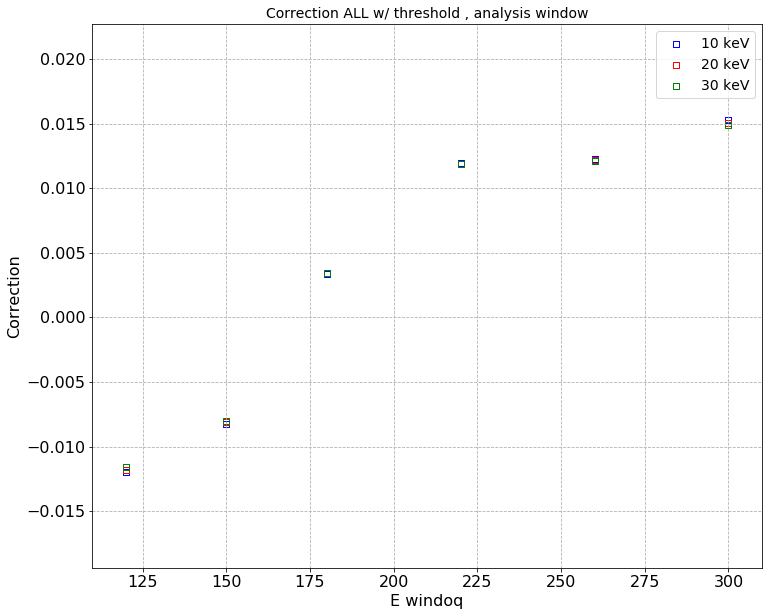

In [59]:
#aNoMis["3"]
#transposed_aNoMis = np.array(list(aNoMis.values())).T
#transposed_aNoMis[:,0]
# Plotting
#plt.scatter(x=E_list, y=transposed_aNoMis[:, 0], alpha=0.7, marker='o', facecolors='none', edgecolors='blue', label='10 keV')
#
plt.figure(figsize=(12, 10))

plt.scatter(x= E_list, y = correction["1"],marker = 's', facecolors='none', edgecolors='blue',label = '10 keV')
plt.scatter(x= E_list, y = correction["2"],marker = 's',  facecolors='none', edgecolors='red', label = '20 keV')
plt.scatter(x= E_list, y = correction["3"],marker = 's',  facecolors='none', edgecolors='green',label = '30 keV')

#plt.axhline(y=-0.11732, color='black', linestyle='--', label='A_0')
#plt.ylim(-0.14,-0.04)
#plt.yticks(np.arange(-0.14,-0.10,0.002))
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(f"Correction", fontsize=16)
plt.xlabel('E windoq', fontsize = 16)
plt.title(f'Correction ALL w/ threshold , analysis window', fontsize = 14)
plt.savefig(f'./mar/uniformcosThDistributionMar22/plots/changedBetacorrectionsAllEthtype0includesBS.png')


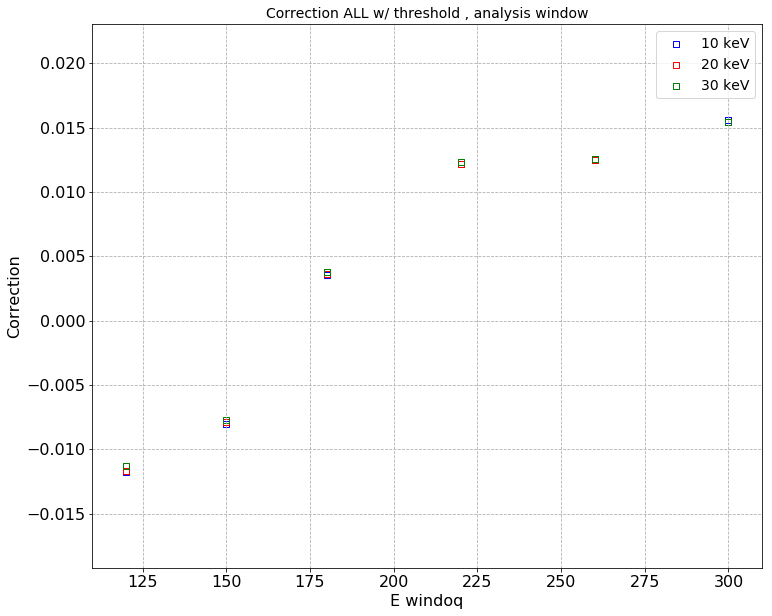

In [60]:
#aNoMis["3"]
#transposed_aNoMis = np.array(list(aNoMis.values())).T
#transposed_aNoMis[:,0]
# Plotting
#plt.scatter(x=E_list, y=transposed_aNoMis[:, 0], alpha=0.7, marker='o', facecolors='none', edgecolors='blue', label='10 keV')
#
plt.figure(figsize=(12, 10))

plt.scatter(x= E_list, y = correctionDirect["1"],marker = 's', facecolors='none', edgecolors='blue',label = '10 keV')
plt.scatter(x= E_list, y = correctionDirect["2"],marker = 's',  facecolors='none', edgecolors='red', label = '20 keV')
plt.scatter(x= E_list, y = correctionDirect["3"],marker = 's',  facecolors='none', edgecolors='green',label = '30 keV')

#plt.axhline(y=-0.11732, color='black', linestyle='--', label='A_0')
#plt.ylim(-0.14,-0.04)
#plt.yticks(np.arange(-0.14,-0.10,0.002))
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(f"Correction", fontsize=16)
plt.xlabel('E windoq', fontsize = 16)
plt.title(f'Correction ALL w/ threshold , analysis window', fontsize = 14)
plt.savefig(f'./mar/uniformcosThDistributionMar22/plots/changedBetacorrectionsAllEthtype0direct.png')


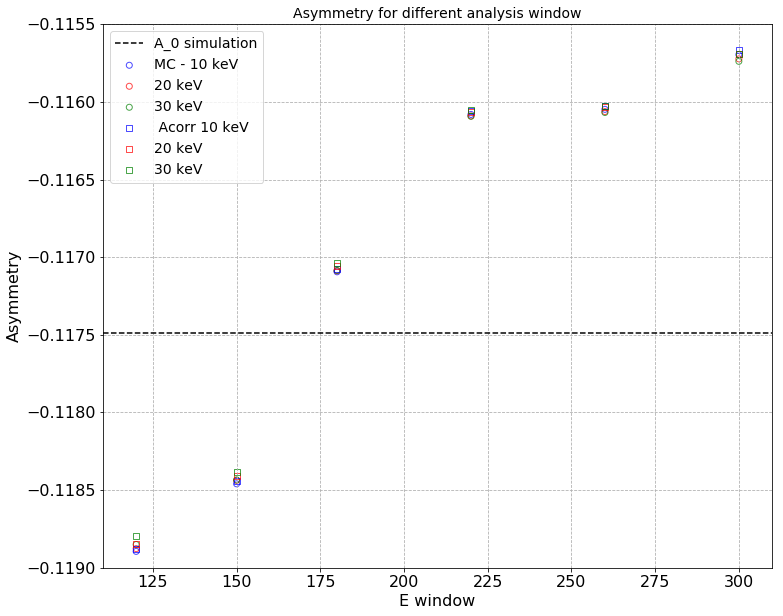

In [58]:
#aNoMis["3"]
#transposed_aNoMis = np.array(list(aNoMis.values())).T
#transposed_aNoMis[:,0]
# Plotting
#plt.scatter(x=E_list, y=transposed_aNoMis[:, 0], alpha=0.7, marker='o', facecolors='none', edgecolors='blue', label='10 keV')
#
plt.figure(figsize=(12, 10))
plt.scatter(x= E_list, y = aMCsim["1"],alpha = 0.7,marker = 'o', facecolors='none', edgecolors='blue',label = 'MC - 10 keV')
plt.scatter(x= E_list, y = aMCsim["2"],alpha = 0.7,marker = 'o',  facecolors='none', edgecolors='red', label = '20 keV')
plt.scatter(x= E_list, y = aMCsim["3"],alpha = 0.7,marker = 'o',  facecolors='none', edgecolors='green',label = '30 keV')


plt.scatter(x= E_list, y = aCorr["1"],alpha = 0.7,marker = 's', facecolors='none', edgecolors='blue',label = ' Acorr 10 keV')
plt.scatter(x= E_list, y = aCorr["2"],alpha = 0.7,marker = 's',  facecolors='none', edgecolors='red', label = '20 keV')
plt.scatter(x= E_list, y = aCorr["3"],alpha = 0.7,marker = 's',  facecolors='none', edgecolors='green',label = '30 keV')

plt.axhline(y=-0.11749, color='black', linestyle='--', label='A_0 simulation')
plt.ylim(-0.119,-0.1155)
#plt.yticks(np.arange(-0.14,-0.10,0.002))
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(f"Asymmetry", fontsize=16)
plt.xlabel('E window', fontsize = 16)
plt.title(f'Asymmetry for different analysis window', fontsize = 14)
plt.savefig(f'./mar/uniformcosThDistributionMar22/plots/hangedBetaasymmetriesAll_type01includes.png')


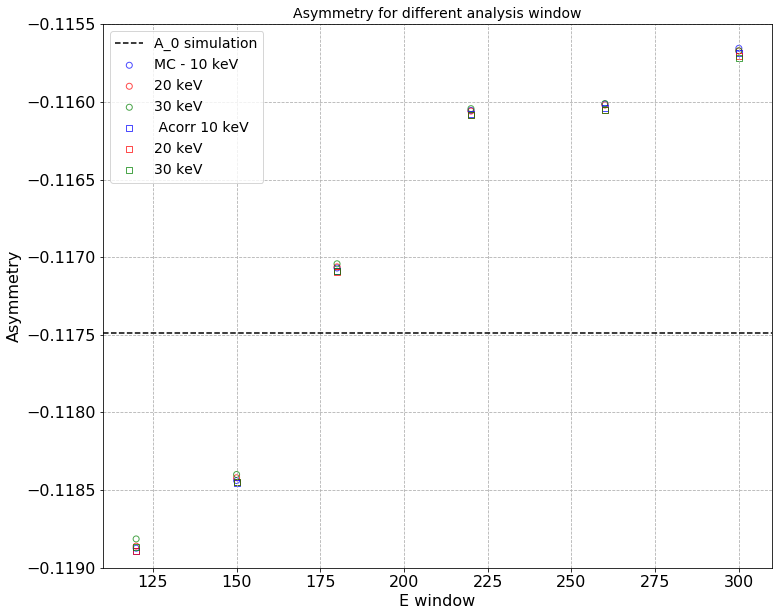

In [57]:
#aNoMis["3"]
#transposed_aNoMis = np.array(list(aNoMis.values())).T
#transposed_aNoMis[:,0]
# Plotting
#plt.scatter(x=E_list, y=transposed_aNoMis[:, 0], alpha=0.7, marker='o', facecolors='none', edgecolors='blue', label='10 keV')
#
plt.figure(figsize=(12, 10))
plt.scatter(x= E_list, y = aMCDirect["1"],alpha = 0.7,marker = 'o', facecolors='none', edgecolors='blue',label = 'MC - 10 keV')
plt.scatter(x= E_list, y = aMCDirect["2"],alpha = 0.7,marker = 'o',  facecolors='none', edgecolors='red', label = '20 keV')
plt.scatter(x= E_list, y = aMCDirect["3"],alpha = 0.7,marker = 'o',  facecolors='none', edgecolors='green',label = '30 keV')


plt.scatter(x= E_list, y = aCorrDirect["1"],alpha = 0.7,marker = 's', facecolors='none', edgecolors='blue',label = ' Acorr 10 keV')
plt.scatter(x= E_list, y = aCorrDirect["2"],alpha = 0.7,marker = 's',  facecolors='none', edgecolors='red', label = '20 keV')
plt.scatter(x= E_list, y = aCorrDirect["3"],alpha = 0.7,marker = 's',  facecolors='none', edgecolors='green',label = '30 keV')

plt.axhline(y=-0.11749, color='black', linestyle='--', label='A_0 simulation')
plt.ylim(-0.119,-0.1155)
#plt.yticks(np.arange(-0.14,-0.10,0.002))
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(f"Asymmetry", fontsize=16)
plt.xlabel('E window', fontsize = 16)
plt.title(f'Asymmetry for different analysis window', fontsize = 14)
plt.savefig(f'./mar/uniformcosThDistributionMar22/plots/changedBetaasymmetriesAll_type01noBS.png')


In [ ]:
#aNoMis["3"]
#transposed_aNoMis = np.array(list(aNoMis.values())).T
#transposed_aNoMis[:,0]
# Plotting
#plt.scatter(x=E_list, y=transposed_aNoMis[:, 0], alpha=0.7, marker='o', facecolors='none', edgecolors='blue', label='10 keV')
#
plt.figure(figsize=(12, 10))
plt.scatter(x= E_list, y = aNoMis["1"],alpha = 0.7,marker = 'o', facecolors='none', edgecolors='blue',label = 'Type 0 & type 1')
plt.scatter(x= E_list, y = aNoMis["2"],alpha = 0.7,marker = 'o',  facecolors='none', edgecolors='red', label = '20 keV')
plt.scatter(x= E_list, y = aNoMis["3"],alpha = 0.7,marker = 'o',  facecolors='none', edgecolors='green',label = '30 keV')


plt.scatter(x= E_list, y = aCorr["1"],alpha = 0.7,marker = 's', facecolors='none', edgecolors='blue',label = 'MC 10 keV')
plt.scatter(x= E_list, y = aCorr["2"],alpha = 0.7,marker = 's',  facecolors='none', edgecolors='red', label = '20 keV')
plt.scatter(x= E_list, y = aCorr["3"],alpha = 0.7,marker = 's',  facecolors='none', edgecolors='green',label = '30 keV')


plt.scatter(x= E_list, y = aMis["1"],alpha = 0.7,marker = '^', facecolors='none', edgecolors='blue',label = 'MisBs 10 keV')
plt.scatter(x= E_list, y = aMis["2"],alpha = 0.7,marker = '^',  facecolors='none', edgecolors='red', label = '20 keV')
plt.scatter(x= E_list, y = aMis["3"],alpha = 0.7,marker = '^',  facecolors='none', edgecolors='green',label = '30 keV')
plt.axhline(y=-0.11732, color='black', linestyle='--', label='A_0')
#plt.ylim(-0.14,-0.04)
#plt.yticks(np.arange(-0.14,-0.10,0.002))
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(f"Asymmetry", fontsize=16)
plt.xlabel('E window', fontsize = 16)
plt.title(f'Asymmetry for different analysis window', fontsize = 14)
plt.savefig(f'./mar/costhChanged/changedBetaasymmetriesAll_type01includesBS_1458add.png')


In [ ]:
colors = sns.color_palette("husl", 7)
colors

In [ ]:
#aNoMis["3"]
#transposed_aNoMis = np.array(list(aNoMis.values())).T
#transposed_aNoMis[:,0]
# Plotting
#plt.scatter(x=E_list, y=transposed_aNoMis[:, 0], alpha=0.7, marker='o', facecolors='none', edgecolors='blue', label='10 keV')
#
plt.figure(figsize=(12, 10))
#plt.scatter(x= [10,20,30], y = correctionWin1,marker = 'o',color=colors[0],label = '120')
#plt.scatter(x= [10,20,30], y = correctionWin2,marker = 'o',color=colors[1],label = '150')
#plt.scatter(x= [10,20,30], y = correctionWin3,marker = 'o',color=colors[2],label = '180')
#plt.scatter(x= [10,20,30], y = correctionWin4,marker = 'o',color=colors[3],label = '220')
#plt.scatter(x= [10,20,30], y = correctionWin5,marker = 'o',color=colors[4],label = '260')
plt.scatter(x= [10,20,30], y = correctionWin6,marker = 'o',color=colors[5],label = '300')

#plt.yscale('log')
plt.ylim(0.504,0.506)
#plt.yticks(np.arange(-0.14,-0.10,0.002))
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(f"Correction", fontsize=16)
plt.xlabel('E threshold', fontsize = 16)
plt.title(f'Correction w/ threshold , analysis window', fontsize = 14)
plt.savefig(f'./feb/ethr-root-misid-eventsCorrection6.png')


In [ ]:
#ucna+
#r_0 : 0.9757276105941303, r1 : 0.01629237508947745
#A_total : -0.043483175185658585, correction : 0.7489424065493153
#r_0 : 0.9757276105941303, r1 : 0.01629237508947745
#A_total : -0.04430096416084123, correction : 0.7442207611960668
#r_0 : 0.9757276105941303, r1 : 0.01629237508947745
#A_total : -0.04501564479125022, correction : 0.7400944296117192
#------------------------------------------------------
#r_0 : 0.9694333457408733, r1 : 0.015082571224051539
#A_total : -0.04312634409864666, correction : 0.7510026322249038
#r_0 : 0.9694333457408733, r1 : 0.015082571224051539
#A_total : -0.043936761388881605, correction : 0.7463235485630392
#r_0 : 0.9694333457408733, r1 : 0.015082571224051539
#A_total : -0.04464576667440659, correction : 0.7422299845588534
#----------------------------------
#r_0 : 0.9610405039370079, r1 : 0.013823244094488188
#A_total : -0.04267975005552554, correction : 0.7535811197717924
#r_0 : 0.9610405039370079, r1 : 0.013823244094488188
#A_total : -0.043483403982103014, correction : 0.7489410855536778
#r_0 : 0.9610405039370079, r1 : 0.013823244094488188
#A_total : -0.04418981032414706, correction : 0.7448625269968414

In [ ]:
aTotucnaP1 = [-0.043483175185658585, -0.04430096416084123, -0.04501564479125022]
aTotucnaP2 = [-0.04312634409864666 , -0.043936761388881605, -0.04464576667440659]
aTotucnaP3 = [ -0.04267975005552554,  -0.043483403982103014, -0.04418981032414706]

In [ ]:
a = 0
for i, key in enumerate(ucna_df.keys()):
    for j in range(3):
        a, delta = aTot(ucna_df[key], aMeas0_ucna[3*i + j], aMeas1_ucna[3*i + j])
        print(f'A_total : {a}, correction : {delta}')


In [ ]:
#ucna
r_0 : 0.9403459527559055, r1 : 0.01288542877594846
A_total : -0.04280181616940626, correction : 0.7528763500611648
r_0 : 0.9403459527559055, r1 : 0.01288542877594846
A_total : -0.04347557338469635, correction : 0.7489862968551019
r_0 : 0.9403459527559055, r1 : 0.01288542877594846
A_total : -0.04476874003647153, correction : 0.7415199766947371
#-----------------------------------------------------
r_0 : 0.9367740816034359, r1 : 0.012276764495347172
A_total : -0.042606102681101016, correction : 0.754006335559463
r_0 : 0.9367740816034359, r1 : 0.012276764495347172
A_total : -0.04328434046396946, correction : 0.7500904130255805
r_0 : 0.9367740816034359, r1 : 0.012276764495347172
A_total : -0.04457557684399915, correction : 0.7426352376212519
#-----------------------------------------------------
r_0 : 0.9310597451682177, r1 : 0.011520229062276306
A_total : -0.04230667092490683, correction : 0.7557351563227088
r_0 : 0.9310597451682177, r1 : 0.011520229062276306
A_total : -0.04297039490145104, correction : 0.7519030317468184
r_0 : 0.9310597451682177, r1 : 0.011520229062276306
A_total : -0.04425474946367455, correction : 0.7444875897016481

In [ ]:
aFor1_UCNAp_wMisid = [-0.1269860534315764, -0.12617516, -0.1250946110534092]
aFor2_UCNAp_wMisid = [-0.1258174801009109, -0.12499959, -0.1239232396477956]
aFor3_UCNAp_wMisid = [-0.1246235454651391, -0.12382252, -0.12276280718428337]
aFor4_UCNAp_wMisid = [-0.1238675737864081, -0.12305846, -0.12201018305087183]

In [ ]:
plt.figure(figsize=(12, 10))
plt.scatter(x= eThr, y = aFor1_UCNAp_wMisid,marker = 's', c = 'brown', label = 'UCNA+ 180-660')
plt.scatter(x= eThr, y = aFor2_UCNAp_wMisid,marker = 's', c = 'red', label = 'UCNA+ 200-660')
plt.scatter(x= eThr, y = aFor3_UCNAp_wMisid,marker = 's', c = 'darkorange',label = 'UCNA+ 220-660')
plt.scatter(x= eThr, y = aFor4_UCNAp_wMisid,marker = 's', c = 'pink',label = 'UCNA+ 300-660')

plt.ylim(-0.14,-0.10)
plt.yticks(np.arange(-0.14,-0.10,0.002))
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(f"Asymmetry", fontsize=16)
plt.xlabel('E threshold', fontsize = 16)
plt.title(f'Assymmetry  w/ threshold , analysis window, for different geometry', fontsize = 14)
#plt.savefig(f'./feb/ethr-root-misid-events/asymwthresholdanalysiswindowforgeometry.png')


In [ ]:
#eThr = [10,20,30]
#corrWin1_UCNAp_wMisid = [-0.0823904 , -0.07547876, -0.066268420]
#corrWin2_UCNAp_wMisid = [-0.0724299 , -0.06545854, -0.056284006]
#corrWin3_UCNAp_wMisid = [-0.0622532 , -0.05542558, -0.046392833]
#corrWin4_UCNAp_wMisid = [-0.0558095 , -0.04891289, -0.039977693]

eThr = [10,20,30]
corrWin1_UCNAp_wMisid = [-0.0823904 , -0.07547876, -0.066268420]
corrWin2_UCNAp_wMisid = [-0.0724299 , -0.06545854, -0.056284006]
corrWin3_UCNAp_wMisid = [-0.0622532 , -0.05542558, -0.046392833]
corrWin4_UCNAp_wMisid = [-0.0558095 , -0.04891289, -0.039977693]

In [ ]:
plt.figure(figsize=(12, 10))
plt.scatter(x= eThr, y = corrWin1_UCNAp_wMisid,marker = 's', c = 'brown', label = 'UCNA+ 180-660')
plt.scatter(x= eThr, y = corrWin2_UCNAp_wMisid,marker = 's', c = 'red', label = 'UCNA+ 200-660')
plt.scatter(x= eThr, y = corrWin3_UCNAp_wMisid,marker = 's', c = 'darkorange',label = 'UCNA+ 220-660')
plt.scatter(x= eThr, y = corrWin4_UCNAp_wMisid,marker = 's', c = 'pink',label = 'UCNA+ 300-660')

plt.ylim(-0.1,-0.01)
plt.yticks(np.arange(-0.1,-0.01,0.005))
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(r"Correction$ = \frac{A_{true}-A_{tot}}{A_{true}}$", fontsize=16)
plt.xlabel('E threshold', fontsize = 16)
plt.title(f'Correction  w/ threshold , analysis window, for different geometry', fontsize = 14)
#plt.savefig(f'./feb/ethr-root-misid-events/Correctionwthresholdanalysiswindowforgeometry.png')


In [ ]:


eThr = [10,20,30]
corrWin1_UCNAp_wMisid = [-0.0823904 , -0.055425583819447226, -0.07539012026677464]
corrWin2_UCNAp_wMisid = [-0.0724299 ,-0.048912890339882435, -0.061521610566330986]
corrWin3_UCNAp_wMisid = [-0.0622532 , -0.07557926520460549, -0.04540188464160821]
corrWin4_UCNAp_wMisid = [-0.0558095 , -0.06540526236073747, -0.034952179839967755]
corrWin5_UCNAp_wMisid = [-0.0824530 , -0.05539620911298788, -0.07213291689690753]
corrWin6_UCNAp_wMisid = [-0.0722794 , -0.04892521516388431,  -0.060074741793408874]

In [ ]:
plt.figure(figsize=(12, 10))
plt.scatter(x= eThr, y = corrWin1_UCNAp_wMisid,marker = 's',alpha = 0.5, c = 'black', label = 'UCNA+ 120-600')
plt.scatter(x= eThr, y = corrWin2_UCNAp_wMisid,marker = 's',alpha = 0.5, c = 'red', label = 'UCNA+ 150-600')
plt.scatter(x= eThr, y = corrWin3_UCNAp_wMisid,marker = 's',alpha = 0.5, c = 'darkorange',label = 'UCNA+ 180-600')
plt.scatter(x= eThr, y = corrWin4_UCNAp_wMisid,marker = 's',alpha = 0.5, c = 'green',label = 'UCNA+ 220-600')
plt.scatter(x= eThr, y = corrWin5_UCNAp_wMisid,marker = 's',alpha = 0.5, c = 'deepskyblue',label = 'UCNA+ 260-600')
plt.scatter(x= eThr, y = corrWin6_UCNAp_wMisid,marker = 's',alpha = 0.5, c = 'purple',label = 'UCNA+ 300-600')

plt.ylim(-0.09,-0.03)
plt.yticks(np.arange(-0.1,-0.01,0.005))
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(r"Correction$ = \frac{A_{true}-A_{tot}}{A_{true}}$", fontsize=16)
plt.xlabel('E threshold', fontsize = 16)
plt.title(f'Correction  w/ threshold , analysis window, for different geometry', fontsize = 14)
plt.savefig(f'./feb/ethr-root-misid-events/marCorrectionwthresholdanalysiswindowforgeometry.png')


In [55]:
elambda = -1.2701
print(f'A_0{-2.*elambda*(1.+elambda)/(1.+3.*elambda*elambda)}')

A_0-0.11749507342887887


In [ ]:
plt.figure(figsize=(12, 10))
ethr =[10,20,30]
plt.scatter(x= ethr, y = corrWin1_UCNA, c = 'blue', marker = 'o',label = 'UCNA 180-660')
plt.scatter(x= ethr, y = corrWin2_UCNA, c = 'aquamarine', marker = 'o',label = 'UCNA 200-660')
plt.scatter(x= ethr, y = corrWin3_UCNA, c = 'darkorchid', marker = 'o',label = 'UCNA 220-660')

plt.scatter(x= ethr, y = corrWin1_UCNAp,marker = 's', c = 'brown', label = 'UCNA+ 180-660')
plt.scatter(x= ethr, y = corrWin2_UCNAp,marker = 's', c = 'red', label = 'UCNA+ 200-660')
plt.scatter(x= ethr, y = corrWin3_UCNAp,marker = 's', c = 'darkorange',label = 'UCNA+ 220-660')

plt.ylim(0.615,0.650)
plt.yticks(np.arange(0.615,0.650,0.002))
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(r"Correction$ = \frac{A_{true}-A_{tot}}{A_{true}}$", fontsize=16)
plt.xlabel('E threshold', fontsize = 16)
plt.title(f'Correction  w/ threshold , analysis window, for different geometry', fontsize = 14)
#plt.savefig(f'./feb/ethr-root/Correctionwthresholdanalysiswindowforgeometry.png')


In [ ]:
ethr = [10,20,30]

In [ ]:
corrWin1_UCNA = [ 0.6351703360943892, 0.6368385383472467,  0.6393908035722228]
corrWin2_UCNA = [ 0.6294274344979854, 0.6310574457554597 , 0.6337334222515254 ]
corrWin3_UCNA = [  0.6184048752431679, 0.6200513395499562, 0.6227859745680655]

In [ ]:
corrWin1_UCNAp = [ 0.6293626390584846, 0.6324041587227527,0.6362107905256944 ]
corrWin2_UCNAp = [0.6223920545444832,  0.6254964082093283, 0.6293606888671751]
corrWin3_UCNAp = [ 0.6163003342034588,   0.6194530627820781, 0.6233394960437517
                  ]

In [ ]:
plt.figure(figsize=(12, 10))
ethr =[10,20,30]
plt.scatter(x= ethr, y = corrWin1_UCNA, c = 'blue', marker = 'o',label = 'UCNA 180-660')
plt.scatter(x= ethr, y = corrWin2_UCNA, c = 'aquamarine', marker = 'o',label = 'UCNA 200-660')
plt.scatter(x= ethr, y = corrWin3_UCNA, c = 'darkorchid', marker = 'o',label = 'UCNA 220-660')

plt.scatter(x= ethr, y = corrWin1_UCNAp,marker = 's', c = 'brown', label = 'UCNA+ 180-660')
plt.scatter(x= ethr, y = corrWin2_UCNAp,marker = 's', c = 'red', label = 'UCNA+ 200-660')
plt.scatter(x= ethr, y = corrWin3_UCNAp,marker = 's', c = 'darkorange',label = 'UCNA+ 220-660')

plt.ylim(0.615,0.650)
plt.yticks(np.arange(0.615,0.650,0.002))
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(r"Correction$ = \frac{A_{true}-A_{tot}}{A_{true}}$", fontsize=16)
plt.xlabel('E threshold', fontsize = 16)
plt.title(f'Correction  w/ threshold , analysis window, for different geometry', fontsize = 14)
#plt.savefig(f'./feb/ethr-root/Correctionwthresholdanalysiswindowforgeometry.png')


In [ ]:
#a =[win1 , win2, win 3]
aTotucna1 = [ -0.04280181616940626,  -0.04347557338469635, -0.044768740036471]
aTotucna2 = [-0.042606102681101016,  -0.04328434046396946, -0.04457557684399915 ]
aTotucna3 = [ -0.04230667092490683,  -0.04297039490145104,   -0.04425474946367455]

In [ ]:
aWin1UCNA = [aTotucna1[0],aTotucna2[0],aTotucna3[0]] 
aWin2UCNA = [aTotucna1[1],aTotucna2[1],aTotucna3[1]] 
aWin3UCNA = [aTotucna1[2],aTotucna2[2],aTotucna3[2]] 

In [ ]:
aWin1UCNAp = [aTotucnaP1[0],aTotucnaP2[0],aTotucnaP3[0]] 
aWin2UCNAp = [aTotucnaP1[1],aTotucnaP2[1],aTotucnaP3[1]] 
aWin3UCNAp = [aTotucnaP1[2],aTotucnaP2[2],aTotucnaP3[2]] 

In [ ]:
plt.figure(figsize=(12, 10))
x = [180,220,260]
plt.scatter(x= ethr, y = aWin1UCNA, c = 'blue', marker = 'o',label = 'UCNA 180-660')
plt.scatter(x= ethr, y = aWin2UCNA, c = 'aquamarine', marker = 'o',label = 'UCNA 200-660')
plt.scatter(x= ethr, y = aWin3UCNA, c = 'darkorchid', marker = 'o',label = 'UCNA 220-660')

plt.scatter(x= ethr, y = aWin1UCNAp,marker = 's', c = 'brown', label = 'UCNA+ 180-660')
plt.scatter(x= ethr, y = aWin2UCNAp,marker = 's', c = 'red', label = 'UCNA+ 200-660')
plt.scatter(x= ethr, y = aWin3UCNAp,marker = 's', c = 'darkorange',label = 'UCNA+ 220-660')

plt.ylim(-0.0465,-0.0420)
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel("Asymmetry", fontsize=16)
plt.xlabel('E threshold', fontsize = 16)
plt.title(f'Asymmetry w/ threshold , analysis window, for different geometry', fontsize = 14)
plt.savefig(f'./feb/ethr-root/AsymmetrywthresholdAnalysisWindowdiffeometry.png')


In [ ]:
plt.figure(figsize=(12, 10))

plt.scatter(x= ethr, y = aTotucna1, c = 'blue', marker = 'o',label = 'UCNA > 10 keV')
plt.scatter(x= ethr, y = aTotucna2, c = 'aquamarine', marker = 'o',label = 'UCNA > 20 keV')
plt.scatter(x= ethr, y = aTotucna3, c = 'darkorchid', marker = 'o',label = 'UCNA > 30 keV')

plt.scatter(x= ethr, y = aTotucnaP1,marker = 's', c = 'brown', label = 'UCNA+ > 10 keV')
plt.scatter(x= ethr, y = aTotucnaP2,marker = 's', c = 'red', label = 'UCNA+ > 20 keV')
plt.scatter(x= ethr, y = aTotucnaP3,marker = 's', c = 'darkorange',label = 'UCNA+ > 30 keV')

plt.ylim(-0.0455,-0.042)
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)

## correction

## count the dead events

In [ ]:
def deadEvts(df):
    n01 = df["EdepType01;1"].sum()
    n11 = df["EdepType11;1"].sum()
    n02 = df["EdepType02;1"].sum()
    n12 = df["EdepType12;1"].sum()
    Ndead = NTot - (n01  + n02 +n11 + n12)
    
    return Ndead

In [ ]:

for key in ucna_df.keys():
    nDead_ucna = deadEvts(ucna_df[key])
    nDead_ucnap = deadEvts(ucnaP_df[key])
    print(f'nDead_UCNA : {(nDead_ucna/NTot)*100}%, nDead_UCNA+ : {(nDead_ucnap/NTot)*100}%')

In [ ]:
nDeadUCNA = [4.676861846814603, 5.09491539012169, 5.7420025769506085]
nDeadUCNAPlus = [0.7980014316392269, 1.548408303507516, 2.513625196850394 ] 

In [ ]:
plt.figure(figsize=(12, 10))

plt.scatter(y = nDeadUCNA, x= [10,20,30], c = 'blue', marker = 'o', label ='UCNA')
plt.scatter(y = nDeadUCNAPlus, x = [10,20,30], c = 'red', marker = 'x', label = 'UCNA+')
plt.xlabel("Energy Thershold(keV)", fontsize=16)
plt.ylabel(r"Dead events ($\%$)", fontsize=16)
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Percentage of dead events for UCNA and UCNA+')   
plt.savefig((f'./feb/ethr-root/PercentageDeadeventsUCNAandUCNA+.png'))

In [ ]:
ucnaP_df['3'].columns

## a from total rate

In [ ]:
def a_tot_rate(df, col1, col2) : 
    N1 = df[col1].sum()
    N2 = df[col2].sum()
    print(f'N1 : {N1} , N2 : {N2}, N1+N2 : {N1+N2}')
    A = (N1-N2)/(N1+N2)
    errA = A*np.sqrt((1/N1)+(1/N2))
    return A, errA

In [ ]:
a0_ucna = []
a0_ucnap = []
a1_ucna = []
a1_ucnap = []
err_a0_ucna = []
err_a0_ucnap = []
err_a1_ucna = []
err_a1_ucnap = []
for key in ucna_df.keys():
    a0  , erra0 = a_tot_rate(ucna_df[key], "EdepType01;1", "EdepType02;1")
    a1  , erra01= a_tot_rate(ucna_df[key], "EdepType11;1", "EdepType12;1")


    a0_P  , erra0_p = a_tot_rate(ucnaP_df[key], "EdepType01;1", "EdepType02;1")
    a1_P  , erra01_p= a_tot_rate(ucnaP_df[key], "EdepType11;1", "EdepType12;1")
#    a0_ucna.append(a0)
#    a0_ucnap.append(a0_P)
#    a1_ucna.append(a1) 
#    a1_ucnap.append(a1_P)
#    err_a0_ucna.append(erra0) 
#    err_a0_ucnap.append(erra0_p)
#    err_a1_ucna.append(erra01)
#    err_a1_ucnap.append(erra01_p) 


In [ ]:
Nucna - 164336148.0 + 1125059.0

## asymmetry for total rate

In [ ]:
e = np.arange(10,40,10)
plt.figure(figsize=(12, 10))

plt.errorbar(x = e, y = a0_ucna, yerr = err_a0_ucna, color = 'blue', label = 'UCNA', fmt = 'o')
plt.errorbar(x = e, y = a1_ucna, yerr = err_a1_ucna, color = 'blue', label = 'UCNA', fmt = 'x')

plt.errorbar(x = e, y = a0_ucnap, yerr = err_a0_ucnap, color = 'red', label = 'UCNA+' ,fmt = 'o')
plt.errorbar(x = e, y = a1_ucnap, yerr = err_a1_ucnap, color = 'red', label = 'UCNA+' ,fmt = 'x')
plt.xlabel("Energy threshold (keV)", fontsize=16)
plt.ylabel("Asymmetry", fontsize=16)
#plt.ylim(-0., 0.1)
plt.xlim(0, 40)
plt.yticks(np.arange(-0.06, -0.02, 0.002), fontsize=16)
plt.xticks(np.arange(0, 40, 5), fontsize=16)
plt.grid(linestyle='--')
plt.legend(fontsize = 16)
plt.title(f"Asymmetry for diff geometry for diffferent threshold ", fontsize=16)
plt.savefig('./AsymmetryGeometryDiffferentThreshold.png')
        

In [ ]:
cna_df['1']['A_meas'].isna().sum()

In [ ]:
for key in ucnaP_df.keys():
    print(ucnaP_df[key].shape)
 #   print(ucna_df[key].shape) 
    ucnap_item = ucnaP_df[key]
 #   ucna_item = ucna_df[key]
    plt.figure(figsize=(12, 10))

    # Assuming "Evals" is a column in your DataFrame
#    plt.scatter(x=ucna_item["Evals"] , y=ucna_item["A_meas"] ,alpha = 0.7,  marker='X', facecolors='none', edgecolors='blue',label='UCNA')
    plt.scatter(x=ucnap_item["Evals"], y=ucnap_item["a_type0"],alpha = 0.7,  marker='o', facecolors='none', edgecolors='red',label='UCNA+')

    plt.xlabel("Energy (keV)", fontsize=16)
    plt.ylabel("Asymmetry", fontsize=16)
    plt.title(f"Asymmetry Type 0 E_Thr > {key}0 (keV)", fontsize=16)
#    plt.ylim(-0.12, 0.12)
    plt.xlim(0, 820)
    plt.yticks(np.arange(-0.12, 0.12, 0.01), fontsize=16)
    plt.xticks(np.arange(0, 820, 50), fontsize=16)
    plt.grid(linestyle='--')

    # Add a legend if needed
    plt.legend()
   
    #plt.savefig(f'./feb/ethr-root/aymmetryType0{str(key)}.png')
       #  ucnap_item = asymm_meas(ucnaP_df[key])
  #  ucna_item = asymm_meas(ucna_df[key])


In [ ]:
for key in ucnaP_df.keys():
    print(ucnaP_df[key].shape)
    print(ucna_df[key].shape)


In [ ]:
for key in ucnaP_df.keys():
   # print(ucnaP_df[key].shape)
   # print(ucna_df[key].shape) 
    ucnap_item = ucnaP_df[key]
    ucna_item = ucna_df[key]
    plt.figure(figsize=(12, 10))

    # Assuming "Evals" is a column in your DataFrame
    plt.scatter(x=ucna_item["Evals"] , y=ucna_item["A_meas1"] ,alpha = 0.7,  marker='X', facecolors='none', edgecolors='blue',label='UCNA')
    plt.scatter(x=ucnap_item["Evals"], y=ucnap_item["A_meas1"],alpha = 0.7,  marker='o', facecolors='none', edgecolors='red',label='UCNA+')

    plt.xlabel("Energy (keV)", fontsize=16)
    plt.ylabel("Asymmetry", fontsize=16)
    plt.title(f"Asymmetry Type 1 E_Thr > {key}0 (keV)", fontsize=16)
    plt.ylim(-1.5, 1.5)
    plt.xlim(0, 820)
    plt.yticks(np.arange(-1.5, 1.5, 0.1), fontsize=16)
    plt.xticks(np.arange(0, 820, 50), fontsize=16)
    plt.grid(linestyle='--')

    # Add a legend if needed
    plt.legend()
   
    plt.savefig(f'./feb/ethr-root/aymmetryType1{str(key)}.png')
       #  ucnap_item = asymm_meas(ucnaP_df[key])
  #  ucna_item = asymm_meas(ucna_df[key])


## ucna-df defn

In [ ]:
ucna_df = {}
for file_num, file_path in ucna.items():
    # Open the ROOT file using uproot
    print(f'file_num : {file_num}')
    with uproot.open(file_path) as file:
        # Access the TTree within the file (replace "tree_name" with the actual tree name)
     #   tree = file["tree_name"]

        # Initialize dictionaries to store results
        content_dict = {}
        edge_dict = {}

        # Loop through the list of keys
        for key in keys:
            # Access the specific branch using the key
            branch = file[key]

            # Extract values and edges
            nVal = branch.values()
            nEdge = branch.axis().edges()[:-1]

            # Store results in dictionaries
            content_dict[key] = nVal
            edge_dict[key] = nEdge

        # Create DataFrames from the dictionaries
        values_df = pd.DataFrame(content_dict)
        edge_df = pd.DataFrame(edge_dict)

        # Take one column from edge_df and rename it
        select_edge_col = edge_df['EdepType01;1'].rename('Evals')

        # Concatenate values_df and select_edge_col
        ucna_df[file_num] = pd.concat([values_df, select_edge_col], axis=1)

        # Delete temporary DataFrames to free up memory
        del values_df, edge_df, select_edge_col


In [ ]:
for key1, df1 in ucnaP_df.items():
    for key2, df2 in ucnaP_df.items():
        if key1 != key2:
            if df1.equals(df2):
                print(f"{key1} and {key2} are exactly the same.")
            else:
                print(f"{key1} and {key2} are different.")

In [ ]:

Nucna= 8.73125e+07
NucnaP = 1e+08

## NTot

In [ ]:

NTot= 8.73125e+07
#NucnaP = 1e+08

## Type 0 spectra ucna and ucna+

/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


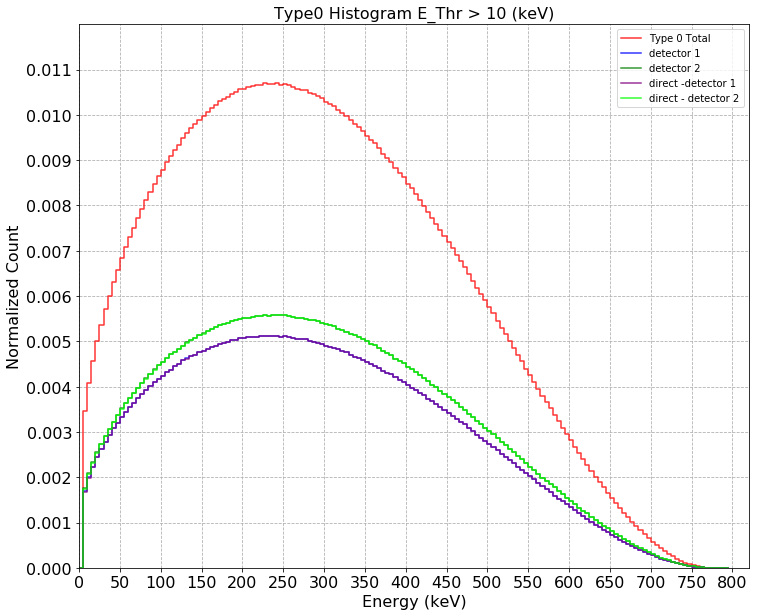

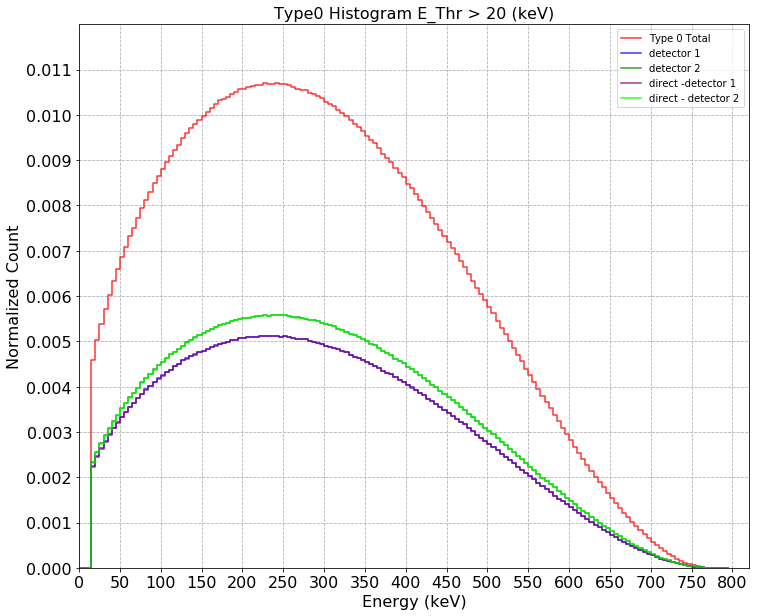

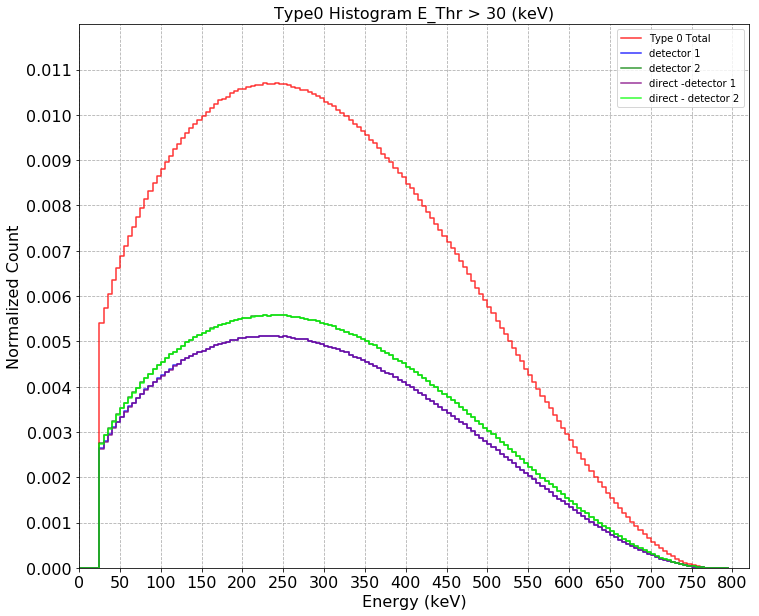

In [27]:
nEvents = 80000000
for key in ucnaP_df.keys():
    ucnap_item = ucnaP_df[key]
   # ucna_item = ucna_df[key]

    plt.figure(figsize=(12, 10))

    # Assuming "Evals" is a column in your DataFrame
   # plt.step(x=ucna_item["Evals"], y=ucna_item["EdepType0;1"] / NTot, c='blue'  ,alpha = 0.8, label='UCNA')
    plt.step(x=ucnap_item["Evals"], y=ucnap_item["EdepType0;1"] / nEvents, c='red',alpha = 0.8, label='Type 0 Total')
    plt.step(x=ucnap_item["Evals"], y=ucnap_item["EdepType01;1"] / nEvents, c='blue',alpha = 0.8, label='detector 1')
    plt.step(x=ucnap_item["Evals"], y=ucnap_item["EdepType02;1"] / nEvents, c='green',alpha = 0.8, label='detector 2')

    plt.step(x=ucnap_item["Evals"], y=ucnap_item["direct01;1"] / nEvents, c='purple',alpha = 0.8, label='direct -detector 1')
    plt.step(x=ucnap_item["Evals"], y=ucnap_item["direct02;1"] / nEvents, c='lime',alpha = 0.8, label='direct - detector 2')


    plt.xlabel("Energy (keV)", fontsize=16)
    plt.ylabel("Normalized Count", fontsize=16)
    plt.title(f"Type0 Histogram E_Thr > {key}0 (keV)", fontsize=16)
    plt.ylim(0.0, 0.012)
    plt.yticks(np.arange(0, 0.012, 0.001), fontsize=16)
    plt.xlim(0, 820)
    plt.xticks(np.arange(0, 820, 50), fontsize=16)
    plt.grid(linestyle='--')

    # Add a legend if needed
    plt.legend()
    plt.savefig(f'./mar/uniformcosThDistributionMar22/plots/type0ucnaP5keVbw{str(key)}.png')
  

In [ ]:
ucnaPmis_df[key] 

type 0 misid spectra

/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


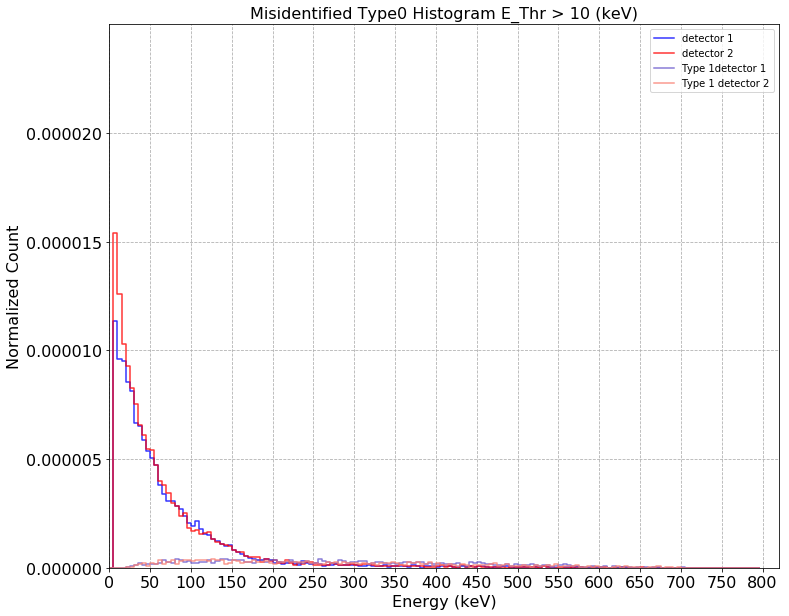

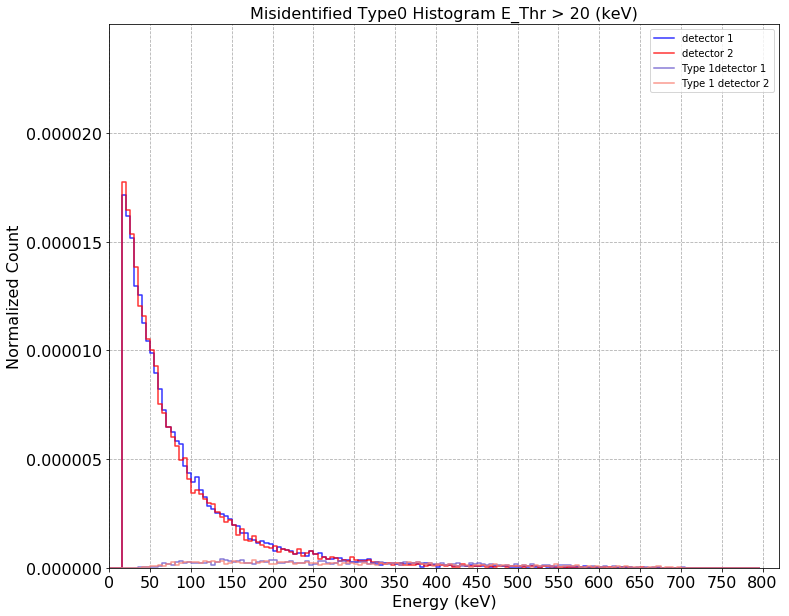

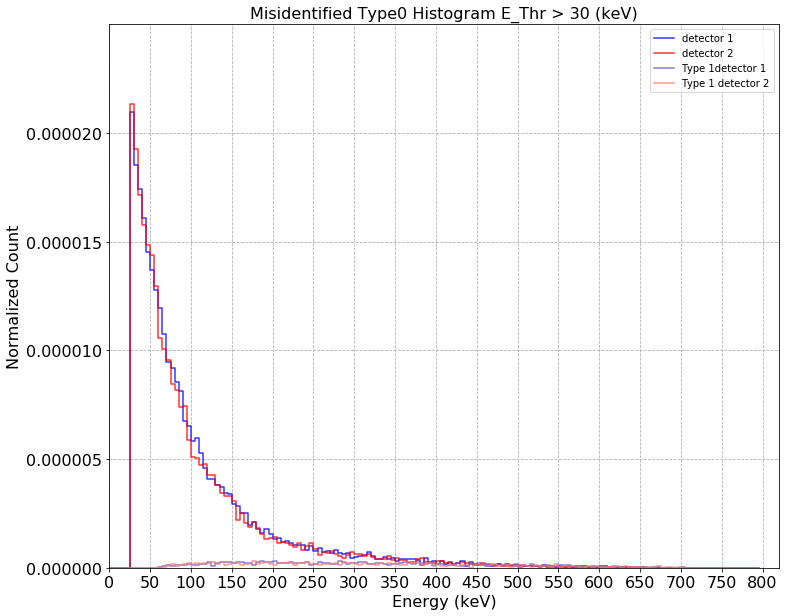

In [31]:
for key in ucnaPmis_df.keys():
    ucnaPmis = ucnaPmis_df[key]
  #
    plt.figure(figsize=(12, 10))

    # Assuming "Evals" is a column in your DataFrame
    plt.step(x=ucnaPmis["Evals"], y=ucnaPmis["misEdepType01;1"] / nEvents, c='blue',alpha = 0.8, label='detector 1')
    plt.step(x=ucnaPmis["Evals"], y=ucnaPmis["misEdepType02;1"] / nEvents, c='red' ,alpha = 0.8, label='detector 2')
    plt.step(x=ucnaPmis["Evals"], y=ucnaPmis["misEdepType11;1"] / nEvents, c='slateblue',alpha = 0.8, label='Type 1detector 1')
    plt.step(x=ucnaPmis["Evals"], y=ucnaPmis["misEdepType12;1"] / nEvents, c='salmon' ,alpha = 0.8, label='Type 1 detector 2')

    plt.xlabel("Energy (keV)", fontsize=16)
    plt.ylabel("Normalized Count", fontsize=16)
    plt.title(f"Misidentified Type0 Histogram E_Thr > {key}0 (keV)", fontsize=16)
    plt.ylim(0.0, 0.000025)
    plt.xlim(0, 820)
    plt.yticks(np.arange(0, 0.000025, 0.000005), fontsize=16)
   
    plt.xticks(np.arange(0, 820, 50), fontsize=16)
    plt.grid(linestyle='--')
    

    # Add a legend if needed
    plt.legend()
    plt.savefig(f'./mar/uniformcosThDistributionMar22/plots/MisIdtcnaP{str(key)}.png')
  

## type 1 spectra ucna and ucna+

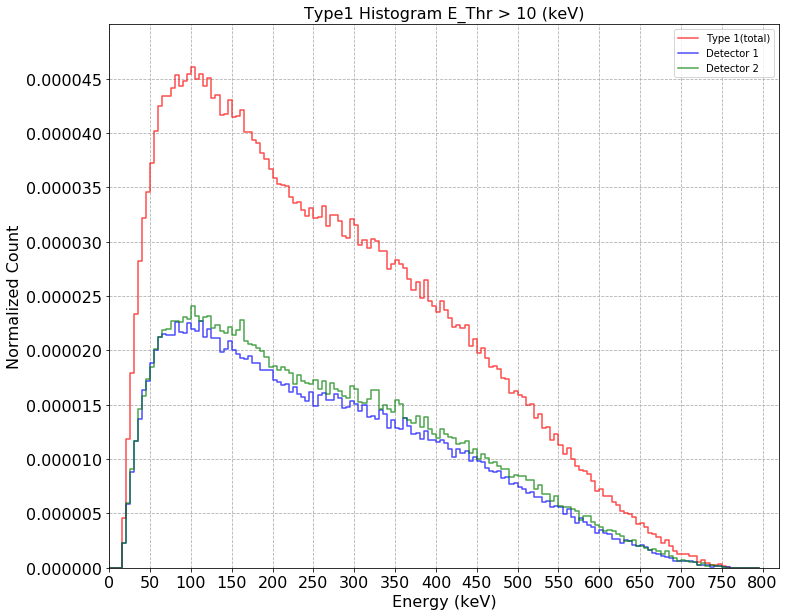

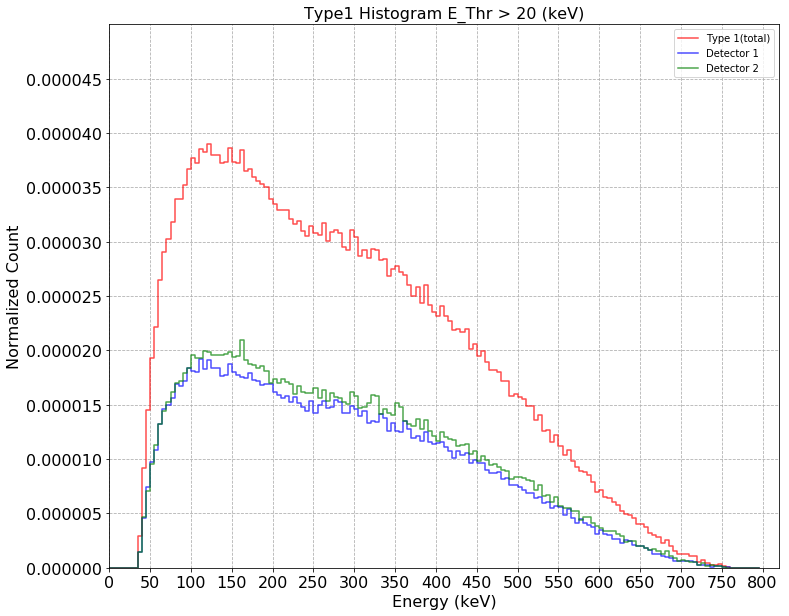

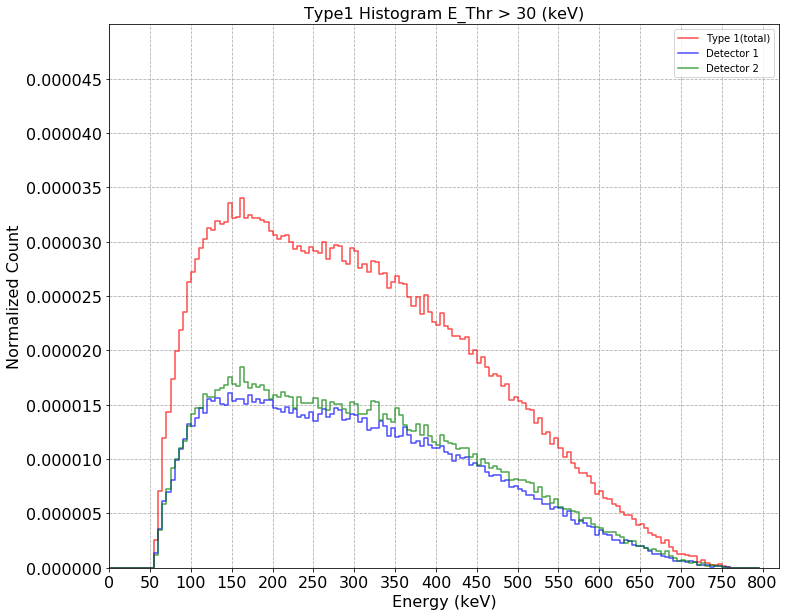

In [30]:
for key in ucnaP_df.keys():
    ucnap_item = ucnaP_df[key]
   # ucna_item = ucna_df[key]

    plt.figure(figsize=(12, 10))

    # Assuming "Evals" is a column in your DataFrame
    plt.step(x=ucnap_item["Evals"], y=ucnap_item["EdepType1;1"] / nEvents,alpha = 0.7, c='red', label='Type 1(total)')
    plt.step(x=ucnap_item["Evals"], y=ucnap_item["EdepType11;1"] / nEvents,alpha = 0.7, c='blue', label='Detector 1')
    plt.step(x=ucnap_item["Evals"], y=ucnap_item["EdepType12;1"] / nEvents,alpha = 0.7, c='green', label='Detector 2')
  
   # plt.step(x=ucna_item["Evals"],  y=ucna_item["EdepType1;1"] / nEvents  ,alpha = 0.7, c='blue', label='UCNA')

    plt.xlabel("Energy (keV)", fontsize=16)
    plt.ylabel("Normalized Count", fontsize=16)
    plt.title(f"Type1 Histogram E_Thr > {key}0 (keV)", fontsize=16)
    plt.xlim(0, 820)
    plt.ylim(0.0, 0.00005)
    plt.yticks(np.arange(0, 0.00005, 0.000005), fontsize=16)
    plt.xticks(np.arange(0, 820, 50), fontsize=16)
    plt.grid(linestyle='--')

    # Add a legend if needed
    plt.legend()
    plt.savefig(f'./mar/uniformcosThDistributionMar22/plots/type1ucnaP5keVbw{str(key)}.png')
  

In [ ]:
for key in ucnaP_df.keys():
    ucnap_item = ucnaP_df[key]
    ucna_item = ucna_df[key]

    plt.figure(figsize=(12, 10))

    # Assuming "Evals" is a column in your DataFrame
    plt.step(x=ucna_item["Evals"], y=ucna_item["EdepType0;1"] / Nucna, c='blue'  ,alpha = 0.8, label='UCNA')
    plt.step(x=ucnap_item["Evals"], y=ucnap_item["EdepType0;1"] / NucnaP, c='red',alpha = 0.8, label='UCNA+')

    plt.xlabel("Energy (keV)", fontsize=16)
    plt.ylabel("Normalized Count", fontsize=16)
    plt.title(f"Type0 Histogram E_Thr > {key}0 (keV)", fontsize=16)
    plt.ylim(0.0, 0.00025)
    plt.xlim(0, 820)
    plt.yticks(np.arange(0, 0.00025, 0.00001), fontsize=16)
    plt.xticks(np.arange(0, 820, 50), fontsize=16)
    plt.grid(linestyle='--')

    # Add a legend if needed
    plt.legend()
    plt.savefig(f'./feb/ethr-rootfiles/type0ucnaanducnaP{str(key)}.png')
  

In [ ]:

ucnaP_df={}
for file_num, ucna_obj in ucnaP.items() : 
    print(ucna_obj)
    content_dict = {}
    edge_dict = {}

    for key in keys:
        branch = ucna_obj[key]
        nVal = branch.array()
        nEdge = branch.axis().edges()[:-1]

    #storing the values in the dictionary
        content_dict[key] = nVal
        edge_dict[key] = nEdge

    values_df = pd.DataFrame(content_dict)
    edge_df = pd.DataFrame(edge_dict)
    select_edge_col = edge_df['EdepType01;1'].rename('Evals')
    ucnaP[file_num] = pd.concat([values_df, select_edge_col], axis = 1)
    del values_df, edge_df, select_edge_col



## Dead Events - deposited 0 energy

In [ ]:
for key in ucnap_df.keys():
    # energy deposited in both the detector is zero. - sum that event
    x_df = ucnaP_df[key]
    x_df["EdepType01;1"] == 0 & x_df["EdepType02;1"] == 0

In [ ]:
ucnaP_df["1"]["EdepType0;1"].sum()

In [ ]:
plt.plot(ucnaP_df["1"]["EdepType11;1"])
plt.xlim(0,100)

checking something

In [ ]:
ucnaP_df["1"].head(100)

for 

## BS

In [ ]:
ucnaP['2']

In [ ]:
values_df = pd.DataFrame(content_dict)
# Give a new name to the combined column
#combined_df['new_column_name'] = combined_df['selected_column']  # Replace 'new_column_name' with the desired new name

#

In [ ]:
ucna_p_1_df.head()

In [ ]:
edge_df

In [ ]:
sns.histplo(values_df['EdepType01;1'])

In [ ]:
ucnaPType0 = pd.read_csv('./feb/nDecay_100Mill_Type0.txt',sep = " ", header = None, dtype = dtype,names = col)


In [ ]:
ucnaPType0.shape

In [ ]:
ucnaPType0.head()

In [ ]:
e1only = ucnaPType0[ucnaPType0['E1'] > 0 ]
e1only.shape

In [ ]:
e2only = ucnaPType0[ucnaPType0['E2'] > 0 ]
e2only.shape

In [ ]:
eCheck = ucnaPType0[(ucnaPType0['E1'] > 30 )| (ucnaPType0['E2'] >0)]
eCheck.shape

In [ ]:
sns.histplot(eCheck['KE'], binrange=(0,800), bins = 8000)

In [ ]:
eCheck['Etot'] = eCheck['E1'] + eCheck['E2']
sns.histplot(eCheck['Etot'])

In [ ]:
sns.histplot(data = ucnaPType0, x = 'KE', binrange=(0,800). binwidth=)

In [ ]:
ucnaType0 = pd.read_csv('./feb/nDecayUCNA_withGas_100MillType0.txt',sep = " ", header = None, dtype = dtype,names = col)


In [ ]:
sns.histplot(ucnaPType0['KE'], bins = 800)

In [ ]:
ucnaPType0['Etot'] = ucnaPType0['E1'] + ucnaPType0['E2'] 

In [ ]:
sns.histplot(ucnaPType0['Etot'], bins = 800)

In [ ]:
sns.histplot(ucnaPType0['Etot'], bins = 800, element='step', fill=False)

In [ ]:
ucnaType0['Etot'] = ucnaType0['E1'] + ucnaType0['E2'] 

In [ ]:
sns.histplot(ucnaPType0['pZe'])

In [ ]:
sns.distplot(ucnaPType0['Etot'], bins = 8000 )

In [ ]:
E = 30 
ucnaType0 = ucnaType0[ucnaType0['E1'] > E]

ucnaPType0 = ucnaPType0[ucnaPType0['E1'] > E]

In [ ]:
sns.histplot(ucnaType0['Etot'])

In [ ]:
sns.histplot(ucnaType0['E1'])

In [ ]:
sns.histplot(ucnaType0['E2'])

In [ ]:
x = ucnaPType0[ucnaPType0['E1'] < 30 ]

x

In [ ]:
E = 30
ucnaPAboveThr['E1'] = ucnaPType0[ucnaPType0['E1'] > E]
#ucnaPAboveThr['TotE'] = ucnaPAboveThr['E1'] + ucnaPAboveThr['E2']
#sns.histplot(ucnaPAboveThr['TotE'])

In [ ]:
ucnaPAboveThr['TotE'] = ucnaPAboveThr['E1'] + ucnaPAboveThr['E2']

In [ ]:
sns.histplot(ucnaPAboveThr['TotE'])

In [ ]:
ucna_plus = "/home/rhythm/Research/ml/research/2024/feb/nDecay_100Mill_foilBothSide.root" #UCNA+
ucna = "/home/rhythm/Research/ml/research/2024/feb/nDecayUCNA_100Mill_foilBothSide.root" #UCNA
#

In [ ]:
ucna_plus = uproot.open(ucna_plus)
ucna = uproot.open(ucna)


In [ ]:
histogram_data = ucna["EdepType0"]
bin_edges = histogram_data.axis().edges()
bin_contents = histogram_data.values()

#for edge, content in zip(bin_edges, bin_contents):
#    print(f"Bin Edge: {edge}, Bin Content: {content}")
selected_bins = bin_edges > 1.0
filtered_bin_contents = bin_contents[selected_bins[:-1]]  # Exclude the last bin

# Calculate the total count for selected bins
total_count_selected_bins = sum(filtered_bin_contents)
print("Total Count for bins with edge > 1.0:", total_count_selected_bins)



In [ ]:
ucna_E01 = ucna["EdepType01"]
e01 = ucna_E01.axis().edges()
n01 = ucna_E01.values()
ucna_E02 = ucna["EdepType02"]
e02 = ucna_E02.axis().edges()[:-1]
n02 = ucna_E02.values()


In [ ]:
ucna_E01P = ucna_plus["EdepType01"]
e01_P = ucna_E01P.axis().edges()
n01_P = ucna_E01P.values()
ucna_E02P = ucna_plus["EdepType02"]
e02_P = ucna_E02P.axis().edges()[:-1]
n02_P = ucna_E02P.values()


In [ ]:
data = {'Energy': e02, 'N01': n01, 'N02': n02}
dataP = {'Energy': e02_P, 'N01': n01_P, 'N02': n02_P}
# Create a DataFrame
ucna_df = pd.DataFrame(data)
ucnaP_df = pd.DataFrame(dataP)
# Display the DataFrame
#print(ucna_df)


In [ ]:
ucna_df

In [ ]:

for E in np.arange(10,35,5):
   # ucna_df.loc[ucna_df['Energy'] < E, 'N01'] = 0
    ucna_df['Ntot'] = ucna_df['N01'] + ucna_df['N02']
    x = ucna_df[ucna_df['Energy'] > E]

    #ucnaP_df.loc[ucnaP_df['Energy'] < E, 'N01'] = 0
    ucnaP_df['Ntot'] = ucnaP_df['N01'] + ucnaP_df['N02']
    p = ucnaP_df[ucnaP_df['Energy'] > E]

    plt.figure(figsize=(12, 10))

    plt.step(x = x['Energy'], y = x['Ntot']/Nucna , c = 'blue', label = 'UCNA')
    plt.step(x = p['Energy'], y = p['Ntot']/NucnaP,c = 'red', label = 'UCNA+' )
    plt.xlabel("Energy (keV)", fontsize = 16)
    plt.ylabel("Normalised Count", fontsize = 16)
    plt.title(f"EdepType0 Histogram E_Thr > {E} (keV)", fontsize = 16)
    plt.ylim(0.0, 0.00025)
    plt.xlim(0,820)
    plt.yticks(np.arange(0,0.00025,0.00001), fontsize = 16)
    plt.xticks(np.arange(0,820,50), fontsize = 16)
    plt.grid(linestyle = '--')
    # Add a legend if needed
    plt.legend()
    plt.savefig(f'./feb/cutsOnBothDetectorspectraType0{E}'+'.jpg')

In [ ]:
def asymmetry(df):
    df['A_meas'] = (df['N01'] - df['N02']) /(df['N01']+df['N02']) 
    return df

In [ ]:

for E in np.arange(10,35,5):
    ucna_a = asymmetry(ucna_df)
    x = ucna_a[ucna_a['Energy'] > E]

    ucnaP_a = asymmetry(ucnaP_df)
    p = ucnaP_a[ucnaP_a['Energy'] > E]

    plt.figure(figsize=(12, 10))

    plt.scatter(x = x['Energy'], y = x['A_meas'], c = 'blue',alpha = 0.2, label = 'UCNA')
    plt.scatter(x = p['Energy'], y = p['A_meas'], c = 'red' ,alpha = 0.2, label = 'UCNA+' )
    plt.xlabel("Energy (keV)", fontsize = 16)
    plt.ylabel("Normalised Count", fontsize = 16)
    plt.ylim(-0.5, 0.5)
    plt.xlim(0,820)
    plt.yticks(np.arange(-0.5,0.5,0.05), fontsize = 16)
    plt.xticks(np.arange(0,820,50), fontsize = 16)
    plt.grid(linestyle = '--')
    # Add a legend if needed
    plt.legend()
    plt.title(f"A_meas type 0 E_Thr > {E} (keV)", fontsize = 16)
    plt.savefig(f'./feb/A_measType0{E}'+'.jpg')

In [ ]:
def asymmetryTot(df):
    N1  = df['N01'].sum()
    N2  = df['N02'].sum()
    a_meas = (N1-N2)/(N1+N2)
   # errAmeas = 
    return a_meas

In [ ]:
ucna_aMeasTot  = []
ucnaP_aMeasTot = []

for E in np.arange(10,120,5):
    x = ucna_df[ucna_df['Energy'] > E]

    p = ucnaP_a[ucnaP_a['Energy'] > E]
    a_measX = asymmetryTot(x)
    a_measP = asymmetryTot(p)
    ucna_aMeasTot.append(a_measX)
    ucnaP_aMeasTot.append(a_measP)
#plt.figure(figsize=(12, 10))
#
#plt.scatter(x = , y = x['A_meas'], c = 'blue',alpha = 0.2, label = 'UCNA')
#plt.scatter(x = p['Energy'], y = p['A_meas'], c = 'red' ,alpha = 0.2, label = 'UCNA+' )
#plt.xlabel("Energy (keV)", fontsize = 16)
#plt.ylabel("Normalised Count", fontsize = 16)
#plt.ylim(-0.5, 0.5)
#plt.xlim(0,820)
#plt.yticks(np.arange(-0.5,0.5,0.05), fontsize = 16)
#plt.xticks(np.arange(0,820,50), fontsize = 16)
#plt.grid(linestyle = '--')
## Add a legend if needed
#plt.legend()
#plt.title(f"A_meas type 0 E_Thr > {E} (keV)", fontsize = 16)


In [ ]:
energy = np.arange(10,120,5)

In [ ]:
plt.figure(figsize=(12, 10))
plt.xlabel("Energy (keV) - Threshold", fontsize = 16)
plt.ylabel(r"$A_{meas} = \frac{N_1-N_2}{N_1+N_2}$ ", fontsize = 16)
plt.ylim(-0.057, -0.047)
plt.xlim(0,130)
plt.yticks(np.arange(-0.057,-0.047,0.0005), fontsize = 16)
plt.xticks(np.arange(0,130,5), fontsize = 14, rotation = 45 )
plt.grid(linestyle = '--')


plt.scatter(x = energy, y = ucna_aMeasTot, c = 'blue', label = 'UCNA')
plt.scatter(x = energy, y = ucnaP_aMeasTot, c = 'red', label = 'UCNA+')
plt.legend()
plt.title(f"A_meas, Type0 as function of E_Thr (keV)", fontsize = 16)
plt.savefig(f'./feb/graphs/A_measType0functionofE_Thr.jpg')

In [ ]:
plt.scatter(x = ucna_df['Energy'], y = ucna_df['N01'], alpha = 0.2, )

In [ ]:
columnUCNAp  = ['nHit','KE', 'E1', 'E2', 't1', 't2', 'pin', 'pOut', 'pZe']
columnUCNA  = ['nHit','KE', 'E1', 'E2', 't1', 't2', 'pin', 'pOut', 'pZe', 'eMWPC1','eMWPC2']
dtype = np.float32

In [ ]:
eUCNA_type1 = pd.read_csv('./feb/nDecayUCNA_withGas_100MillType1.txt' ,sep =" ",header = None, dtype = dtype,names = columnUCNA).drop(['pin', 'pOut','eMWPC1','eMWPC2'], axis = 1)
eUCNAP_type1 = pd.read_csv('./feb/nDecay_100Mill_foilBothSide.txt',sep =" ", header = None, dtype = dtype,names = columnUCNAp)

In [ ]:
eUCNA_type1['Etot'] = eUCNA_type1['E1'] + eUCNA_type1['E2']
eUCNAP_type1['Etot'] = eUCNAP_type1['E1'] + eUCNAP_type1['E2']

In [ ]:
#totalCountRate
r1_ucna  = []
r2_ucna  = [] 
r1_ucnaP = []
r2_ucnaP = []
err_r1_ucna  = []
err_r2_ucna  = [] 
err_r1_ucnaP = []
err_r2_ucnaP = []
r_ucna  = [] 
r_ucnaP = []

for E in np.arange(10,110,10):
    ucnaThr = ucna_df[ucna_df['Energy'] > E]
    r01 = ucnaThr['N01'].sum()
    r02 = ucnaThr['N02'].sum()
    print(f'UCNA : r01 : {r01}, r02 : {r02}')
    ucnaPThr = ucnaP_df[ucnaP_df['Energy'] > E]
    r01_P = ucnaPThr['N01'].sum()
    r02_P = ucnaPThr['N02'].sum()
    print(f'UCNA+: r01 : {r01_P}, r02 : {r02_P}')
    r11 = eUCNA_type1[(eUCNA_type1['t1'] < eUCNA_type1['t2'])&( eUCNA_type1['E1'] > E)].shape[0]

    r21 = eUCNA_type1[(eUCNA_type1['t2'] < eUCNA_type1['t1'])&( eUCNA_type1['E1'] > E)].shape[0]
    print(f'UCNA : r11 : {r11}, r21 : {r21}')
    r11_P = eUCNAP_type1[(eUCNAP_type1['t1'] < eUCNAP_type1['t2'])&( eUCNAP_type1['E1'] > E)].shape[0]
    
    r21_P = eUCNAP_type1[(eUCNAP_type1['t2'] < eUCNAP_type1['t1'])&( eUCNAP_type1['E1'] > E)].shape[0]
    print(f'UCNA+: r11 : {r11_P}, r21 : {r21_P}')
    ratio1_ucna  = r11/r01 
    ratio2_ucna  = r21/r02 
    ratio1_ucnaP = r11_P/r01_P
    ratio2_ucnaP = r21_P/r02_P
    rUCNA = (r11+r21)/(r01+r01)
    rUCNAP = (r11_P+r21_P)/(r01_P+r02_P)
    err1_ucna = ratio1_ucna*((1/np.sqrt(r11))+(1/np.sqrt(r01)))
    err2_ucna = ratio2_ucna*((1/np.sqrt(r21))+(1/np.sqrt(r02)))
    err1_ucnaP = ratio1_ucnaP*((1/np.sqrt(r11_P))+(1/np.sqrt(r01_P)))
    err2_ucnaP = ratio2_ucnaP*((1/np.sqrt(r21_P))+(1/np.sqrt(r02_P)))
    r1_ucna.append(ratio1_ucna)  
    r2_ucna.append(ratio2_ucna)  
    r1_ucnaP.append(ratio1_ucnaP) 
    r2_ucnaP.append(ratio2_ucnaP) 
    err_r1_ucna.append(err1_ucna)
    err_r2_ucna.append(err2_ucna) 
    err_r1_ucnaP.append(err1_ucnaP)
    err_r2_ucnaP.append(err2_ucnaP)
    r_ucna.append(rUCNA)  
    r_ucnaP.append(rUCNAP)

In [ ]:
energyThr = np.array(np.arange(10,110,10))
plt.figure(figsize=(12, 10))

plt.errorbar(x=energyThr, y=r1_ucna, yerr=err_r1_ucna, fmt = 'o',c='blue', label='UCNA - Ratio 1')
plt.errorbar(x=energyThr, y=r2_ucna, yerr=err_r2_ucna, fmt = 'x',c='blue', label='UCNA - Ratio 2')
plt.errorbar(x=energyThr, y=r1_ucnaP, yerr=err_r1_ucnaP,fmt = 'o',c='red', label='UCNA+ - Ratio 1')
plt.errorbar(x=energyThr, y=r2_ucnaP, yerr=err_r2_ucnaP,fmt = 'x',c='red', label='UCNA+ - Ratio 2')

# Add labels and legend
plt.xlabel('Energy')
plt.ylabel('Ratio')
plt.title('Ratios with Error Bars')
plt.legend()
plt.xlabel("Energy (keV)", fontsize = 16)
plt.ylabel(r"Ratios = $\frac{\Gamma_{Type1}}{\Gamma_{Type0}}$", fontsize = 16)
plt.title(f"Comparison of ratio for different E_Threshold", fontsize = 16)
plt.ylim(0.0, 0.017)
plt.xlim(0,110)
plt.yticks(np.arange(0,0.018,0.001), fontsize = 16)
plt.xticks(np.arange(0,110,10), fontsize = 16)
plt.grid(linestyle = '--')
## Add a legend if needed
plt.legend(fontsize = 16)
#plt.savefig(f'ratioVSthr.jpg')

In [ ]:
energyThr = np.array(np.arange(10,110,10))
plt.figure(figsize=(12, 10))

plt.scatter(x=energyThr, y=r_ucna,  c='blue', label='UCNA - Ratio 1')
plt.scatter(x=energyThr, y=r_ucnaP, c='red', label='UCNA+ - Ratio 2')
#plt.errorbar(x=energyThr, y=r1_ucnaP, yerr=err_r1_ucnaP,fmt = 'o',c='red', label='UCNA+ - Ratio 1')
#plt.errorbar(x=energyThr, y=r2_ucnaP, yerr=err_r2_ucnaP,fmt = 'x',c='red', label='UCNA+ - Ratio 2')

# Add labels and legend
plt.xlabel('Energy')
plt.ylabel('Ratio')
plt.title('Ratios with Error Bars')
plt.legend()
plt.xlabel("Energy (keV)", fontsize = 16)
plt.ylabel(r"Ratios = $\frac{\Gamma_{Type1}}{\Gamma_{Type0}}$", fontsize = 16)
plt.title(f"Comparison of ratio for different E_Threshold", fontsize = 16)
plt.ylim(0.0, 0.017)
plt.xlim(0,110)
plt.yticks(np.arange(0,0.018,0.001), fontsize = 16)
plt.xticks(np.arange(0,110,10), fontsize = 16)
plt.grid(linestyle = '--')
## Add a legend if needed
plt.legend(fontsize = 16)
plt.savefig(f'ratiototVSthr.jpg')

In [ ]:
eUCNAP_type1

In [ ]:

for E in np.arange(10,35,5):
    ucnaType1EThr = eUCNA_type1[(eUCNA_type1['E1'] > E) | (eUCNA_type1['E2'] > E )] 
    ucnaPType1EThr = eUCNAP_type1[(eUCNAP_type1['E1'] > E) | (eUCNAP_type1['E2'] > E )] 
    
#    eUCNAP_type1.loc[eUCNAP_type1['E1'] < E, 'E1'] = 0
    
    ucnaType1EThr['Etot'] = ucnaType1EThr['E1'] + ucnaType1EThr['E2']
    ucnaPType1EThr['Etot'] = ucnaPType1EThr['E1'] + ucnaPType1EThr['E2']
    plt.figure(figsize=(12, 10))
    print(f'N_Type 1 UCNA : ', ucnaType1EThr.shape[0]/Nucna)
    print(f'N_Type 1 UCNA+ : ', ucnaPType1EThr.shape[0]/NucnaP)
   
   # sns.histplot(data = ucnaType1EThr, x = 'Etot', stat='density',element='step', fill=False, color='blue', label = 'UCNA')
   # sns.histplot(data = ucnaPType1EThr, x = 'Etot', element='step', stat='density', fill=False, color='red', label = 'UCNA+')
   # plt.xlabel("Energy (keV)", fontsize = 16)
   # plt.ylabel("Normalised Count", fontsize = 16)
   # plt.title(f"Type 1 Histogram E_Thr > {E} (keV)", fontsize = 16)
   # plt.ylim(0.0, 0.0025)
   # plt.xlim(0,820)
   # plt.yticks(np.arange(0,0.0025,0.0001), fontsize = 16)
   # plt.xticks(np.arange(0,820,50), fontsize = 16)
   # plt.grid(linestyle = '--')
   # # Add a legend if needed
   # plt.legend()
   # plt.savefig(f'./feb/spectraType1BTS{E}'+'.jpg')

In [ ]:
print("Bin Contents for bins with edge > 1.0:")
for edge, content in zip(bin_edges[:-1], bin_contents):
    if edge > 1.0:
        print(f"Bin Edge: {edge}, Bin Content: {content}")


In [ ]:
eType0_ucna  = ucna["EdepType0"]
eType0_ucnaP = ucna_plus["EdepType0"]
# Get bin edges and contents
bin_edges_ucna = eType0_ucna.axis().edges()
bin_contents_ucna = eType0_ucna.values()

bin_edges_ucnaP   = eType0_ucnaP.axis().edges()
bin_contents_ucnaP= eType0_ucnaP.values()
# total NCounts
Nucna= 8.73125e+07
NucnaP = 1e+08

In [ ]:
eType01_ucna  = ucna["EdepType01"]
eType01_ucnaP = ucna_plus["EdepType01"]
# Get bin edges and contents
bin_edges_ucna_01 = eType01_ucna.axis().edges()
bin_contents_ucna_01 = eType01_ucna.values()

bin_edges_ucnaP_01   = eType01_ucnaP.axis().edges()
bin_contents_ucnaP_01= eType01_ucnaP.values()

In [ ]:
bin_contents_ucna_01

In [ ]:
plt.figure(figsize=(12, 10))

plt.step(bin_edges[:-1], normalized_contents, where='post', label="UCNA+")
#plt.step(bin_edges_ucna[:-1], normalized_contents_ucna, where='post', label="UCNA")

# Add labels and title
plt.xlabel("Energy (keV)", fontsize = 16)
plt.ylabel("Normalised Count", fontsize = 16)
plt.title("EdepType0 Histogram")
#plt.ylim(0.0, 0.00125)
plt.xlim(0,820)
#plt.yticks(np.arange(0,0.00025,0.00005), fontsize = 16)
plt.xticks(np.arange(0,820,50), fontsize = 16)
plt.grid(linestyle = '--')
# Add a legend if needed
plt.legend()

In [ ]:
#bin cut on detector 1 
energyCut_ucna = bin_edges_ucna_01 > 10.0
bin_contents_ucna = bin_contents_ucna_01[energyCut_ucna[:-1]]  # Exclude the last bin
# Interpolate filtered_bin_contents to match bin_edges1
interpolated_filtered_bin_contents = np.interp(bin_edges_ucna_01[:-1], bin_edges_ucna[:-1][energyCut_ucna[:-1]], filtered_bin_contents)

#Type0Rate 
tot_rate = (bin_contents_ucna-interpolated_filtered_bin_contents)/Nucna

# Plot the histogram lines for selected bins
plt.step(bin_edges[:-1][selected_bins[:-1]], tot_rate, where='post', color='b', linestyle='-')
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")
plt.title("Histogram Lines for Bins with Edge > 1.0")
plt.show()

In [ ]:
# Filter bins where bin edge is greater than 1.0
selected_bins = bin_edges > 1.0
filtered_bin_contents = bin_contents[selected_bins[:-1]]  # Exclude the last bin

# Plot the histogram lines for selected bins
plt.step(bin_edges[:-1][selected_bins[:-1]], filtered_bin_contents, where='post', color='b', linestyle='-')
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")
plt.title("Histogram Lines for Bins with Edge > 1.0")
plt.show()

In [ ]:
histogram_data = ucna["EdepType0"]
bin_edges = histogram_data.axis().edges()
bin_contents = histogram_data.values()
total_Count = sum(bin_contents)
print(total_Count)
# Filter bins where bin edge is greater than 30
selected_bins = bin_edges > 2
print(bin_contents)
filtered_bin_contents = bin_contents[selected_bins[:-1]]
print(filtered_bin_contents)
# Calculate the total count for selected bins
total_count = sum(filtered_bin_contents)

print(total_Count)
normalized_contents = bin_contents
#plt.figure(figsize=(12, 10))

plt.step(bin_edges[:-1], normalized_contents, where='post', label="UCNA+")
plt.step(bin_edges_ucna[:-1], normalized_contents_ucna, where='post', label="UCNA")
#
## Add labels and title
plt.xlabel("Energy (keV)", fontsize = 16)
plt.ylabel("Normalised Count", fontsize = 16)
plt.title("EdepType0 Histogram")
#plt.ylim(0.0, 0.00125)
plt.xlim(0,820)
#plt.yticks(np.arange(0,0.00025,0.00005), fontsize = 16)
plt.xticks(np.arange(0,820,50), fontsize = 16)
plt.grid(linestyle = '--')
# Add a legend if needed
plt.legend()



In [ ]:
ucnaType0 = pd.read_csv('./feb/nDecay_100Mill_Type0.txt',sep = " ", header = None, dtype = dtype,names = col)


In [ ]:
ucnaOldType0 = pd.read_csv('./feb/nDecay_100Mill_Type0.txt',sep = " ", header = None, dtype = dtype,names = col)


In [ ]:
ucna01_opp = pd.read_csv('./jan/nDecayUCNA_100Mill_01_oppDirection.txt',sep = " ", header = None, dtype = dtype,names = col)


In [ ]:
pip install uproot

In [ ]:
import uproot

In [ ]:
tot_evt_ucna = 9.986099e+07
tot_evt_ucna_plus = 1.99875e+07  


In [ ]:
import uproot
import matplotlib.pyplot as plt

# Specify the path to your ROOT file
root_file_path = "/home/rhythm/Research/ml/research/2114/jan/nDecay_100Mill_foilBothSide.root" #UCNA+
root_file_path_ucna = "/home/rhythm/Research/ml/research/2124/jan/nDecayUCNA_100Mill_foilBothSide.root" #UCNA
# Open the ROOT file
file = uproot.open(root_file_path)
file_ucna = uproot.open(root_file_path_ucna)
# Access the histogram data (assuming it's a TH1D named "EdepType0")
tot_evt_ucna = 9.986099e+07
tot_evt_ucna_plus = 1.99875e+07  

histogram_data = file["EdepType0"]
histogram_data_ucna = file_ucna["EdepType0"]
# Extract bin edges and contents from the histogram data
bin_edges = histogram_data.axis().edges()
bin_contents = histogram_data.values()
normalized_contents = bin_contents/tot_evt_ucna_plus 

bin_edges_ucna = histogram_data_ucna.axis().edges()
bin_contents_ucna = histogram_data_ucna.values()
normalized_contents_ucna = bin_contents_ucna/tot_evt_ucna 

# Plot the histogram using Matplotlib
plt.figure(figsize=(12, 10))

plt.step(bin_edges[:-1], normalized_contents, where='post', label="UCNA+")
plt.step(bin_edges_ucna[:-1], normalized_contents_ucna, where='post', label="UCNA")

# Add labels and title
plt.xlabel("Energy (keV)", fontsize = 16)
plt.ylabel("Normalised Count", fontsize = 16)
plt.title("EdepType0 Histogram")
plt.ylim(0.0, 0.00125)
plt.xlim(0,820)
plt.yticks(np.arange(0,0.00025,0.00005), fontsize = 16)
plt.xticks(np.arange(0,820,50), fontsize = 16)
plt.grid(linestyle = '--')
# Add a legend if needed
plt.legend()

# Show the plot
plt.show()
def custom_function(theta, A, beta):
    return 1 + A * beta * np.cos(theta)

## Access the bin contents
#print("Bin Contents:", bin_contents)


In [ ]:
# Access the histogram data (assuming it's a TH1D named "EdepType0")
tot_evt_ucna_01 = 4.588248e+07
tot_evt_ucna_plus_01 = 9286418  


In [ ]:
tot_evt_ucna_01/tot_evt_ucna

In [ ]:
tot_evt_ucna_plus_01/tot_evt_ucna_plus

In [ ]:
(0.4594635002116442 - 0.46461128205128205) / 0.46461128205128205

In [ ]:
# Access the histogram data (assuming it's a TH1D named "EdepType0")
tot_evt_ucna_11 = 4.588248e+07
tot_evt_ucna_plus_11 = 9286418  

histogram_data_11 = file["EdepType11"]
histogram_data_ucna_11 = file_ucna["EdepType11"]
# Extract bin edges and contents from the histogram data
bin_edges_11 = histogram_data_11.axis().edges()
bin_contents_11 = histogram_data_11.values()
normalized_contents_11 = bin_contents_11/tot_evt_ucna_plus 

bin_edges_ucna_11 = histogram_data_ucna_11.axis().edges()
bin_contents_ucna_11 = histogram_data_ucna_11.values()
normalized_contents_ucna_11 = bin_contents_ucna_11/tot_evt_ucna

histogram_data_12 = file["EdepType12"]
histogram_data_ucna_12 = file_ucna["EdepType12"]
# Extract bin edges and contents from the histogram data
bin_edges_12 = histogram_data_12.axis().edges()
bin_contents_12 = histogram_data_12.values()
normalized_contents_12 = bin_contents_12/tot_evt_ucna_plus 

bin_edges_ucna_12 = histogram_data_ucna_12.axis().edges()
bin_contents_ucna_12 = histogram_data_ucna_12.values()
normalized_contents_ucna_12 = bin_contents_ucna_12/tot_evt_ucna


# Plot the histogram using Matplotlib
plt.figure(figsize=(12, 10))

plt.step(bin_edges[:-1], normalized_contents_11, where='post', label="UCNA+ - detector 1")
plt.step(bin_edges_ucna[:-1], normalized_contents_ucna_11, where='post', label="UCNA - detector 1")

plt.step(bin_edges[:-1], normalized_contents_12, where='post', label="UCNA+ - detector 2")
plt.step(bin_edges_ucna[:-1], normalized_contents_ucna_12, where='post', label="UCNA - detector 2")

# Add labels and title
plt.xlabel("Energy (keV)", fontsize = 16)
plt.ylabel("Normalised Count", fontsize = 16)
plt.title("EdepType11 Histogram")
plt.ylim(0.0, 0.0000030)
plt.xlim(0,820)
plt.yticks(np.arange(0,0.0000030,0.0000005), fontsize = 16)
plt.xticks(np.arange(0,820,50), fontsize = 16)
plt.grid(linestyle = '--')
# Add a legend if needed
plt.legend()

# Show the plot
plt.show()


## Access the bin contents
#print("Bin Contents:", bin_contents)


In [ ]:
# Access the histogram data (assuming it's a TH1D named "EdepType0")
tot_evt_ucna_01 = 4.588248e+07
tot_evt_ucna_plus_01 = 9286418  

histogram_data_01 = file["EdepType01"]
histogram_data_ucna_01 = file_ucna["EdepType01"]
# Extract bin edges and contents from the histogram data
bin_edges_01 = histogram_data_01.axis().edges()
bin_contents_01 = histogram_data_01.values()
normalized_contents_01 = bin_contents_01/tot_evt_ucna_plus 

bin_edges_ucna_01 = histogram_data_ucna_01.axis().edges()
bin_contents_ucna_01 = histogram_data_ucna_01.values()
normalized_contents_ucna_01 = bin_contents_ucna_01/tot_evt_ucna

histogram_data_02 = file["EdepType02"]
histogram_data_ucna_02 = file_ucna["EdepType02"]
# Extract bin edges and contents from the histogram data
bin_edges_02 = histogram_data_02.axis().edges()
bin_contents_02 = histogram_data_02.values()
normalized_contents_02 = bin_contents_02/tot_evt_ucna_plus 

bin_edges_ucna_02 = histogram_data_ucna_02.axis().edges()
bin_contents_ucna_02 = histogram_data_ucna_02.values()
normalized_contents_ucna_02 = bin_contents_ucna_02/tot_evt_ucna


# Plot the histogram using Matplotlib
plt.figure(figsize=(12, 10))

plt.step(bin_edges[:-1], normalized_contents_01, where='post', label="UCNA+ - detector 1")
plt.step(bin_edges_ucna[:-1], normalized_contents_ucna_01, where='post', label="UCNA - detector 1")

plt.step(bin_edges[:-1], normalized_contents_02, where='post', label="UCNA+ - detector 2")
plt.step(bin_edges_ucna[:-1], normalized_contents_ucna_02, where='post', label="UCNA - detector 2")

# Add labels and title
plt.xlabel("Energy (keV)", fontsize = 16)
plt.ylabel("Normalised Count", fontsize = 16)
plt.title("EdepType01 Histogram")
plt.ylim(0.0, 0.00015)
plt.xlim(0,820)
plt.yticks(np.arange(0,0.00015,0.00005), fontsize = 16)
plt.xticks(np.arange(0,820,50), fontsize = 16)
plt.grid(linestyle = '--')
# Add a legend if needed
plt.legend()

# Show the plot
plt.show()


## Access the bin contents
#print("Bin Contents:", bin_contents)


In [ ]:
#calculating asymmetry
asymm_UCNA_plus = (bin_contents_01 - bin_contents_02)/(bin_contents_01 + bin_contents_02)
asymm_UCNA = (bin_contents_ucna_01 - bin_contents_ucna_02)/(bin_contents_ucna_01 + bin_contents_ucna_02)

In [ ]:
plt.figure(figsize=(12, 10))

plt.scatter(bin_edges_02[:-1],asymm_UCNA , label = 'UCNA', c = 'orange', alpha = 0.4)
#plt.scatter(bin_edges_02[:-1],asymm_UCNA_plus )
plt.yticks(np.arange(-0.2,0.25,0.05), fontsize = 16)
plt.xticks(np.arange(0,820,50), fontsize = 16)
plt.grid(linestyle = '--')
plt.ylabel('A_measured', fontsize = 14)
plt.xlabel('Energy (keV)', fontsize = 14)
plt.title('Asymmetry measurement from Type 0 events only UCNA geometry')
plt.xlim(30, 720)
plt.ylim(-0.25, 0.25)
# Perform linear regression (fit a straight line)
mask = ~np.isnan(asymm_UCNA)
new_bin_edges_02 = bin_edges_02[:-1][mask]
slope, intercept = np.polyfit(new_bin_edges_02, asymm_UCNA[mask], 1)
#slope, intercept = np.polyfit(bin_edges_02[:-1],asymm_UCNA, 1)

# Create the line equation
line_fit = slope * new_bin_edges_02 + asymm_UCNA[mask]
plt.plot(line_fit, color='red', label=f'Fitted Line: y = {slope:.3f}x  {intercept:.2f}')
plt.legend()

In [ ]:
plt.figure(figsize=(12, 10))

#plt.scatter(bin_edges_02[:-1],asymm_UCNA , label = 'UCNA')
plt.scatter(bin_edges_02[:-1],asymm_UCNA_plus,label = 'UCNA + ' , c='blue', alpha = 0.4)
plt.yticks(np.arange(-0.2,0.25,0.05), fontsize = 16)
plt.xticks(np.arange(0,820,50), fontsize = 16)
plt.grid(linestyle = '--')
plt.ylabel('A_measured', fontsize = 14)
plt.xlabel('Energy (keV)', fontsize = 14)
plt.title('Asymmetry measurement from Type 0 events only- UCNA+')
plt.xlim(30, 720)
plt.ylim(-0.25, 0.25)
mask = ~np.isnan(asymm_UCNA_plus)
new_bin_edges_02 = bin_edges_02[:-1][mask]
slope, intercept = np.polyfit(new_bin_edges_02, asymm_UCNA_plus[mask], 1)
#slope, intercept = np.polyfit(bin_edges_02[:-1],asymm_UCNA, 1)

# Create the line equation
line_fit = slope * new_bin_edges_02 + asymm_UCNA_plus[mask]
plt.plot(line_fit, color='yellow', label=f'Fitted Line: y = {slope:.3f}x  {intercept:.2f}')
plt.legend()


In [ ]:
col = ['TotalNoHits','KE', 'E1', 'E2','pZe']
dtype = np.float16


In [ ]:
ucna01_opp = pd.read_csv('./jan/nDecayUCNA_100Mill_01_oppDirection.txt',sep = " ", header = None, dtype = dtype,names = col)
ucna02_opp = pd.read_csv('./jan/nDecayUCNA_100Mill_02_oppDirection.txt', sep = " ", header=None, names = col, dtype = dtype, )
ucna01_plus_opp   = pd.read_csv('./jan/nDecay+_100Mill_01_oppDirection.txt', sep = " ", header=None, names = col, dtype = dtype, )
ucna02_plus_opp = pd.read_csv('./jan/nDecay+_100Mill_02_oppDirection.txt', sep =" ", header=None, names = col, dtype = dtype,  )

In [ ]:
ucna02_plus_opp/tot_evt_ucna_plus

In [ ]:
ucna01_opp = ucna01_opp[ucna01_opp['E1'] > 30]
#ucna02_opp = ucna02_opp[ucna02_opp['E2'] > 30]
#ucna02_plus_opp = ucna02_plus_opp[ucna02_plus_opp['E2'] > 30]
ucna01_plus_opp = ucna01_plus_opp[ucna01_plus_opp['E1'] > 30]

In [ ]:
print(ucna01_plus_opp.shape[0])
print(ucna02_plus_opp.shape[0])
print(ucna02_opp.shape[0])
print(ucna01_opp.shape[0])

In [ ]:
print(ucna01_plus_opp.shape[0]/tot_evt_ucna_plus)
print(ucna02_plus_opp.shape[0]/tot_evt_ucna_plus)
print(ucna02_opp.shape[0]/tot_evt_ucna)
print(ucna01_opp.shape[0]/tot_evt_ucna)

In [ ]:
plt.figure(figsize=(12, 10))

sns.histplot(ucna01_opp["pZe"], stat = 'density',kde=True, color='orange', label = 'Hits detector 1')
sns.histplot(ucna02_opp["pZe"], stat = 'density',kde=True, color='red', label = 'Hits detector 2')
plt.legend(fontsize = 14)
plt.xlabel('pZe', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Type 0 events - misbackscattered - UCNA geometry E1 > 30 ', fontsize = 14)
plt.grid(linestyle = '--')



In [ ]:
plt.figure(figsize=(12, 10))

sns.histplot(ucna01_plus_opp["pZe"], stat = 'density',kde=True, color='blue', fill = False,label = 'UCNA+ Hits detector 1 ')
sns.histplot(ucna01_opp["pZe"], stat = 'density',kde=True, color='orange', fill = False, label = 'UCNA Hits detector 1')
plt.legend(fontsize = 14)
plt.xlabel('pZe', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Type 0 events - misbackscattered by detetcor 1 | E1 > 30 ', fontsize = 14)
plt.grid(linestyle = '--')



In [ ]:
print(ucna01_plus_opp.shape[0])
print(ucna02_plus_opp.shape[0])
print(ucna02_opp.shape[0])
print(ucna01_opp.shape[0])

In [ ]:
print(ucna01_plus_opp.shape[0]/tot_evt_ucna_plus)
print(ucna02_plus_opp.shape[0]/tot_evt_ucna_plus)
print(ucna02_opp.shape[0]/tot_evt_ucna)
print(ucna01_opp.shape[0]/tot_evt_ucna)

In [ ]:
plt.figure(figsize=(12, 10))

sns.histplot(ucna01_opp["pZe"], kde=True, color='orange', label = 'Hits detector 1')
sns.histplot(ucna02_opp["pZe"], kde=True, color='blue', label = 'Hits detector 2')
plt.legend(fontsize = 14)
plt.xlabel('pZe', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Type 0 events - misbackscattered  UCNA geometry', fontsize = 14)
plt.grid(linestyle = '--')



In [ ]:
plt.figure(figsize=(12, 10))

sns.histplot(ucna01_plus_opp["pZe"], stat = 'density',kde=True, color='skyblue', label = 'Hits detector 1')
sns.histplot(ucna02_plus_opp["pZe"], stat = 'density',kde=True, color='green', label = 'Hits detector 2')
plt.legend(fontsize = 14)
plt.xlabel('pZe', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Type 0 events - misbackscattered - UCNA+ geometry E1 > 30 ', fontsize = 14)
plt.grid(linestyle = '--')



In [ ]:
plt.figure(figsize=(12, 10))

sns.histplot(ucna01_plus_opp["pZe"], kde=True, color='skyblue', label = 'Hits detector 1')
sns.histplot(ucna02_plus_opp["pZe"], kde=True, color='green', label = 'Hits detector 2')
plt.legend(fontsize = 14)
plt.xlabel('pZe', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Type 0 events - misbackscattered - UCNA+ geometry', fontsize = 14)
plt.grid(linestyle = '--')



In [ ]:

import dask.array as da
from dask import delayed

In [ ]:
import uproot
import dask
#import dask.array as da
#from dask import delayed

def read_and_filter(file_path, tree_name="outputTree", branch_name="TotalEnergyDeposited", threshold=30):
    # Open the ROOT file using uproot
    with uproot.open(file_path) as file:
        # Access the TTree from the file
        tree = file[tree_name]

        # Access the branch
        tree = file[tree_name]

        # Access the branch
        energy_branch = tree[branch_name]

         # Read the values from the branch
        energy_values = energy_branch.array()

        # Use Dask.delayed to parallelize the computation
        selected_events = dask.delayed([i for i, value in enumerate(energy_values) if value > threshold])()

        # Compute and print the selected events
        dask.compute(selected_events)



In [ ]:
root_file_path = './feb/feb20-singleRootFiles/ucna.root'
with uproot.open(root_file_path) as file:
    # Access the TTree within the file (replace "tree_name" with the actual tree name)
    tree = file["outputTree"]

    # Access specific branches (replace "branch1", "branch2", etc., with actual branch names)
    E1_values = tree["energyDet1"].array()
    E2_values = tree["energyDet2"].array()
    #t1= tree["timeHitDet1"].array()
    #t2= tree["timeHitDet2"].array()
    #pz= tree["cosangle"].array()
    #ke= tree["KE"].array()

In [ ]:
ucnap_file_path = './feb/feb20-singleRootFiles/ucna_plus.root'
with uproot.open(ucnap_file_path) as file:
    # Access the TTree within the file (replace "tree_name" with the actual tree name)
    tree_p = file["outputTree"]

    # Access specific branches (replace "branch1", "branch2", etc., with actual branch names)
    E1_values_p = tree_p["energyDet1"].array()
    E2_values_p = tree_p["energyDet2"].array()
    #t1_p= tree_p["timeHitDet1"].array()
    #t2_p= tree_p["timeHitDet2"].array()
    #pz_p= tree_p["cosangle"].array()
    #ke_p= tree_p["KE"].array()

In [ ]:
data =  {'E1': E1_values, 'E2': E2_values }
ucna_df = pd.DataFrame(data)

In [ ]:

if ucna_df.equals(ucnap_df):
    print("The DataFrames are equal")
else:
    print("The DataFrames are not equal")

In [ ]:
datap =  {'E1': E1_values_p, 'E2': E2_values_p}
ucnap_df = pd.DataFrame(datap)

In [ ]:
ucnap_df.shape[0] - ucna_df.shape[0]

In [ ]:
x = ucna_df[ucna_df['E1'] !=0]

In [ ]:
x.shape

In [ ]:
sns.histplot(x['E1'])

In [ ]:
y = ucna_df[ucna_df['E2'] !=0]

In [ ]:
sns.histplot(y['E2'])

In [ ]:
del y

In [ ]:
# Example usageread_and_filter("/mnt/gpfs3_amd/scratch/rgu245/Now/nDecayUCNA+/delete.root", branch_name="TotalEnergyDeposited", threshold=30)

read_and_filter("/home/rhythm/Research/ml/research/2024/delete.root", branch_name="TotalEnergyDeposited", threshold=600)


In [ ]:
ucna_df

In [ ]:
x = ucna_df.loc[ucna_df['E1']  <110 ,'E1'] = 0
x

In [ ]:
def aboveThrEvts(df, Ethr):
    df.loc[df['E1']  < Ethr,'E1'] = 0
    df.loc[df['E2']  < Ethr,'E2'] = 0
  #  type0['Etot'] = type0['E1'] + type0['E2']
    return df

In [ ]:
# Create an empty dictionary to store DataFrames
result_dataframes = {}

for E in np.arange(15,40,10):
    E_thr = aboveThrEvts(ucna_df, E)
    #definition of type 1
    type1_thr = E_thr[ (E_thr['E1'] != 0) & (E_thr['E2'] != 0) ]
    type0_thr = E_thr[ (E_thr['E1'] != 0) ^ (E_thr['E2'] != 0) ]
    del E_thr
    type0_thr['Etot'] = (type0_thr['E1'] + type0_thr['E2']).astype(np.float32)
    type0_thr['A_0'] = (type0_thr['E1'] - type0_thr['E2']) / (type0_thr['E1'] + type0_thr['E2'])
    type0_thr = type0_thr.drop(['E1', 'E2'], axis = 1)
    type1_thr['Etot'] = type1_thr['E1'] + type1_thr['E2']
    type1_thr = type1_thr.drop(['E1', 'E2'], axis = 1)
    print(f'energy - {E} type0_thr {type0_thr.shape}, type1_thr{type1_thr.shape}')
    
    result_dataframes[f'type1_thr_E_{E}'] = type1_thr
    result_dataframes[f'type0_thr_E_{E}'] = type0_thr
    del type1_thr,type0_thr

    

In [ ]:
type0_thr_E_15 = result_dataframes['type0_thr_E_15']

# Create a histogram using Seaborn
sns.histplot(type0_thr_E_15['Etot'], bins=8000, kde=True)  # Adjust parameters as needed



In [ ]:
type1_thr

In [ ]:
type1_thr

In [ ]:
sns.histplot(type1_thr['Etot'])

In [ ]:
type1_thr

In [ ]:
ucna_df

In [ ]:
type0_thr